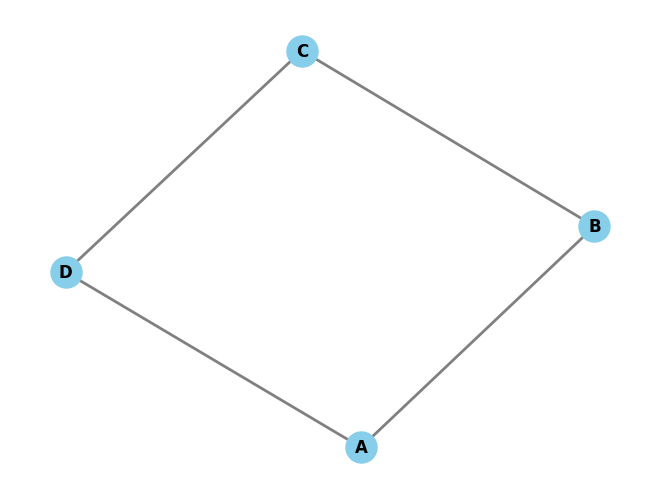

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 빈 그래프 생성
road_network = nx.Graph()

# 도로(에지) 추가
road_network.add_edge("A", "B", length=5.0)  # A와 B 사이의 도로 추가, 길이 5.0
road_network.add_edge("B", "C", length=3.0)  # B와 C 사이의 도로 추가, 길이 3.0
road_network.add_edge("C", "D", length=4.0)  # C와 D 사이의 도로 추가, 길이 4.0
road_network.add_edge("D", "A", length=6.0)  # D와 A 사이의 도로 추가, 길이 6.0

# 그래프 시각화
nx.draw(road_network, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', width=2.0, edge_color='gray')

# 그래프 출력
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
pd.options.display.float_format = '{:.3f}'.format
from scipy.stats import skew, kurtosis
import plotly.express as px


In [5]:
os.getcwd()

'c:\\Users\\hyorim\\Desktop\\공유드라이브\\PythonQuery\\SeoulTraffic'

In [6]:
os.chdir('J:\\링크경로한양도성')

In [7]:
os.getcwd()

'J:\\링크경로한양도성'

In [5]:
link = pd.read_csv('F:\\서울시신호\\데이터\\GIS\\level6_2021년_Shape파일\\link_2021.csv', encoding='cp949')
link

C:\Users\vpslw\AppData\Local\Temp\ipykernel_15136\1182824819.py:1: DtypeWarning: Columns (13,29) have mixed types. Specify dtype option on import or set low_memory=False.
  link = pd.read_csv('F:\\서울시신호\\데이터\\GIS\\level6_2021년_Shape파일\\link_2021.csv', encoding='cp949')


,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,338700014,692901,692903,692903,692901,0,자은서부2길,0,107,32768,...,33870001401,33870001402,20201231,NaN,NaN,410.000,NaN,NaN,0,NaN
1,338700016,693771,692903,692903,693771,0,자은서부2길,0,107,32768,...,33870001601,33870001602,20181231,NaN,NaN,410.000,NaN,NaN,0,2.000
2,338700018,692904,692906,692906,692904,0,자은서부2길,0,107,32768,...,33870001801,33870001802,20181231,NaN,NaN,410.000,NaN,NaN,0,2.000
3,338700019,693771,692906,692906,693771,0,자은서부2길,0,107,32768,...,33870001901,33870001902,20181231,NaN,NaN,410.000,NaN,NaN,0,2.000
4,412300044,100923,100185,100185,100923,50,대한로140번길,0,107,32768,...,41230004401,41230004402,20171231,NaN,NaN,NaN,NaN,NaN,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648792,928849552,1719826,714994,714994,1719826,60,NaN,313,106,32768,...,92884955201,92884955202,20201231,NaN,NaN,420,NaN,NaN,468849552,2.000
648793,928849988,1740516,715032,715032,1740516,0,광덕계양로,0,107,32768,...,92884998801,92884998802,20201231,NaN,NaN,420,NaN,NaN,468849988,2.000
648794,928850761,227835,1696647,1696647,227835,0,통일로,0,104,32768,...,92885076101,92885076102,20201231,NaN,NaN,420,NaN,NaN,478850761,2.000
648795,928850977,228482,1731522,1731522,228482,60,중앙로,0,107,32768,...,92885097701,92885097702,20201231,NaN,NaN,420,NaN,NaN,478850977,2.000


In [8]:
node = pd.read_csv('D:\\서울시신호\\데이터\\gis\\node_2021.csv', encoding='cp949')
node

,node_id,node_type,node_name,tra_light,toll_id,num_link,x,y,sido_id,sigungu_id,emd_id,m_date,rc_id,rc_hist,old_node_i
0,100185,101,동일리,0,0,3,883336.587,1472723.158,39000,39020,3902011,20171231,NaN,NaN,NaN
1,100186,101,NaN,0,0,3,880022.971,1473165.120,39000,39020,3902011,20171231,NaN,NaN,NaN
2,100189,101,대정농공단지입구,4,0,3,880712.923,1473773.753,39000,39020,3902011,20171231,NaN,NaN,NaN
3,100190,101,NaN,0,0,3,882677.497,1471602.826,39000,39020,3902011,20171231,NaN,NaN,NaN
4,100192,101,NaN,0,0,4,882935.496,1471441.060,39000,39020,3902011,20171231,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504643,1900099,109,NaN,0,0,2,1118660.966,1681718.850,38000,38115,3811564,20201231,NaN,500.0,0.0
504644,1900100,109,NaN,0,0,2,1118825.208,1681689.028,38000,38115,3811564,20201231,NaN,500.0,0.0
504645,1900101,109,NaN,0,0,2,1121141.002,1686828.032,38000,38070,3807063,20201231,NaN,500.0,0.0
504646,1900102,109,NaN,0,0,2,1118277.106,1770064.841,37000,37100,3710011,20201231,NaN,500.0,0.0


In [6]:
tm = pd.read_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5.csv')
tm

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [18]:
tm = tm.drop(['Unnamed: 0', 'EIT2'], axis=1)

In [19]:
tm

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id,sigungu_id,emd_id,link_id,in_time_dt,out_time_dt,EIT
0,105020211014002115225S00,1.0,0.0,-1.000000e+00,2021-10-14 00:21:21,2021-10-14 00:21:21,-1.0,-1.0,-1.0,-1.0,2021-10-14 00:21:21,2021-10-14 00:21:21,2021-10-14 00:20:00
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,2021-10-14 00:21:22,2021-10-14 00:21:24,2021-10-14 00:20:00
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,2021-10-14 00:21:25,2021-10-14 00:21:27,2021-10-14 00:20:00
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,2021-10-14 00:21:28,2021-10-14 00:21:31,2021-10-14 00:20:00
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,2021-10-14 00:21:32,2021-10-14 00:21:33,2021-10-14 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,2021-10-14 23:48:28,2021-10-14 23:49:00,2021-10-14 23:45:00
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,2021-10-14 23:49:01,2021-10-14 23:49:31,2021-10-14 23:45:00
8560119,105520211014225942879S00,1.0,188.0,4.778424e+10,2021-10-14 23:49:32,2021-10-14 23:49:32,31000.0,31101.0,3110151.0,477842370.0,2021-10-14 23:49:32,2021-10-14 23:49:32,2021-10-14 23:45:00
8560120,105520211014225942879S00,1.0,189.0,4.778424e+10,2021-10-14 23:49:33,2021-10-14 23:49:34,31000.0,31101.0,3110151.0,477842365.0,2021-10-14 23:49:33,2021-10-14 23:49:34,2021-10-14 23:45:00


In [20]:
tm['v_from_link_id'] = tm['v_link_id'].shift(1)
tm['v_to_link_id'] = tm['v_link_id'].shift(-1)

In [21]:
tm

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id,sigungu_id,emd_id,link_id,in_time_dt,out_time_dt,EIT,v_from_link_id,v_to_link_id
0,105020211014002115225S00,1.0,0.0,-1.000000e+00,2021-10-14 00:21:21,2021-10-14 00:21:21,-1.0,-1.0,-1.0,-1.0,2021-10-14 00:21:21,2021-10-14 00:21:21,2021-10-14 00:20:00,NaN,5.717449e+10
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,2021-10-14 00:21:22,2021-10-14 00:21:24,2021-10-14 00:20:00,-1.000000e+00,5.717449e+10
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,2021-10-14 00:21:25,2021-10-14 00:21:27,2021-10-14 00:20:00,5.717449e+10,5.717441e+10
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,2021-10-14 00:21:28,2021-10-14 00:21:31,2021-10-14 00:20:00,5.717449e+10,5.717420e+10
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,2021-10-14 00:21:32,2021-10-14 00:21:33,2021-10-14 00:20:00,5.717441e+10,5.717441e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,2021-10-14 23:48:28,2021-10-14 23:49:00,2021-10-14 23:45:00,4.778106e+10,4.778106e+10
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,2021-10-14 23:49:01,2021-10-14 23:49:31,2021-10-14 23:45:00,4.778105e+10,4.778424e+10
8560119,105520211014225942879S00,1.0,188.0,4.778424e+10,2021-10-14 23:49:32,2021-10-14 23:49:32,31000.0,31101.0,3110151.0,477842370.0,2021-10-14 23:49:32,2021-10-14 23:49:32,2021-10-14 23:45:00,4.778106e+10,4.778424e+10
8560120,105520211014225942879S00,1.0,189.0,4.778424e+10,2021-10-14 23:49:33,2021-10-14 23:49:34,31000.0,31101.0,3110151.0,477842365.0,2021-10-14 23:49:33,2021-10-14 23:49:34,2021-10-14 23:45:00,4.778424e+10,-1.000000e+00


In [22]:
tm.to_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_fromtolink.csv')

In [23]:
tm = tm[tm['v_link_id']!=-1]
tm = tm[tm['v_from_link_id']!=-1]
tm = tm[tm['v_to_link_id']!=-1]
tm

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id,sigungu_id,emd_id,link_id,in_time_dt,out_time_dt,EIT,v_from_link_id,v_to_link_id
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,2021-10-14 00:21:25,2021-10-14 00:21:27,2021-10-14 00:20:00,5.717449e+10,5.717441e+10
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,2021-10-14 00:21:28,2021-10-14 00:21:31,2021-10-14 00:20:00,5.717449e+10,5.717420e+10
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,2021-10-14 00:21:32,2021-10-14 00:21:33,2021-10-14 00:20:00,5.717441e+10,5.717441e+10
5,105020211014002115225S00,1.0,5.0,5.717441e+10,2021-10-14 00:21:33,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571744132.0,2021-10-14 00:21:33,2021-10-14 00:21:33,2021-10-14 00:20:00,5.717420e+10,5.717441e+10
6,105020211014002115225S00,1.0,6.0,5.717441e+10,2021-10-14 00:21:34,2021-10-14 00:21:39,11000.0,11010.0,1101063.0,571744130.0,2021-10-14 00:21:34,2021-10-14 00:21:39,2021-10-14 00:20:00,5.717441e+10,5.717171e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560115,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,2021-10-14 23:47:01,2021-10-14 23:47:20,2021-10-14 23:45:00,4.778419e+10,4.778106e+10
8560116,105520211014225942879S00,1.0,185.0,4.778106e+10,2021-10-14 23:47:20,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477810626.0,2021-10-14 23:47:20,2021-10-14 23:47:20,2021-10-14 23:45:00,4.778419e+10,4.778105e+10
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,2021-10-14 23:48:28,2021-10-14 23:49:00,2021-10-14 23:45:00,4.778106e+10,4.778106e+10
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,2021-10-14 23:49:01,2021-10-14 23:49:31,2021-10-14 23:45:00,4.778105e+10,4.778424e+10


In [24]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101935 entries, 2 to 8560119
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   obu_id          object 
 1   grp_id          float64
 2   seq             float64
 3   v_link_id       float64
 4   in_time         object 
 5   out_time        object 
 6   sido_id         float64
 7   sigungu_id      float64
 8   emd_id          float64
 9   link_id         float64
 10  in_time_dt      object 
 11  out_time_dt     object 
 12  EIT             object 
 13  v_from_link_id  float64
 14  v_to_link_id    float64
dtypes: float64(9), object(6)
memory usage: 989.0+ MB


In [25]:
tm_merge = pd.merge(left=tm, right=link, how="left", on="link_id")
tm_merge

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,...,5.717449e+10,5.717449e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,5.717441e+10,5.717441e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,...,5.717420e+10,5.717420e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,105020211014002115225S00,1.0,5.0,5.717441e+10,2021-10-14 00:21:33,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571744132.0,...,5.717441e+10,5.717441e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,105020211014002115225S00,1.0,6.0,5.717441e+10,2021-10-14 00:21:34,2021-10-14 00:21:39,11000.0,11010.0,1101063.0,571744130.0,...,5.717441e+10,0.000000e+00,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101930,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,4.778419e+10,4.778419e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101931,105520211014225942879S00,1.0,185.0,4.778106e+10,2021-10-14 23:47:20,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477810626.0,...,4.778106e+10,4.778106e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101932,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,4.778105e+10,4.778105e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101933,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,...,4.778106e+10,4.778106e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [27]:
tm_merge.to_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_fromtolink_6leveljoin.csv')

In [28]:
tm_merge_link = tm_merge[(tm_merge['link_type']==1) | (tm_merge['link_type']==32768)]
tm_merge_link

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
1,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,5.717441e+10,5.717441e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,5.717171e+10,5.717171e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,5.717352e+10,5.717352e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
12,105020211014002115225S00,1.0,17.0,5.717249e+10,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.0,11080.0,1108061.0,571724895.0,...,5.717249e+10,5.717249e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
13,105020211014002115225S00,1.0,18.0,5.717249e+10,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.0,11080.0,1108061.0,571724894.0,...,5.717249e+10,5.717249e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101928,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,4.778102e+10,0.000000e+00,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101930,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,4.778419e+10,4.778419e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101931,105520211014225942879S00,1.0,185.0,4.778106e+10,2021-10-14 23:47:20,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477810626.0,...,4.778106e+10,4.778106e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8101932,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,4.778105e+10,4.778105e+10,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [30]:
tm_merge_link.columns

Index(['obu_id', 'grp_id', 'seq', 'v_link_id', 'in_time', 'out_time',
       'sido_id_x', 'sigungu_id_x', 'emd_id_x', 'link_id', 'in_time_dt',
       'out_time_dt', 'EIT', 'v_from_link_id', 'v_to_link_id', 'up_f_node',
       'up_t_node', 'dw_f_node', 'dw_t_node', 'max_speed', 'road_name',
       'road_no', 'road_rank', 'link_type', 'pavement', 'road_type',
       'facil_name', 'tg_name', 'up_lanes', 'dw_lanes', 'lanes', 'oneway',
       'length', 'up_its_id', 'dw_its_id', 'sido_id_y', 'sigungu_id_y',
       'emd_id_y', 'up_v_link', 'dw_v_link', 'm_date', 'rc_id', 'rc_name',
       'rc_hist', 'rc_date', 'rc_length', 'old_link_i', 'source'],
      dtype='object')

In [31]:
tm_merge_link.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500799 entries, 1 to 8101933
Data columns (total 48 columns):
 #   Column          Dtype  
---  ------          -----  
 0   obu_id          object 
 1   grp_id          float64
 2   seq             float64
 3   v_link_id       float64
 4   in_time         object 
 5   out_time        object 
 6   sido_id_x       float64
 7   sigungu_id_x    float64
 8   emd_id_x        float64
 9   link_id         float64
 10  in_time_dt      object 
 11  out_time_dt     object 
 12  EIT             object 
 13  v_from_link_id  float64
 14  v_to_link_id    float64
 15  up_f_node       float64
 16  up_t_node       float64
 17  dw_f_node       float64
 18  dw_t_node       float64
 19  max_speed       float64
 20  road_name       object 
 21  road_no         float64
 22  road_rank       float64
 23  link_type       float64
 24  pavement        float64
 25  road_type       float64
 26  facil_name      object 
 27  tg_name         object 
 28  up_lanes    

In [33]:
link_count = tm.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id'])['obu_id'].count()
link_count

v_from_link_id  v_link_id     v_to_link_id
4.268000e+10    4.268008e+10  4.268008e+10     1
                4.268000e+10  4.268008e+10     1
4.268002e+10    4.268000e+10  4.268000e+10     1
4.268005e+10    4.268008e+10  4.268008e+10     1
                4.268005e+10  4.268008e+10     1
                                              ..
9.288510e+10    4.788685e+10  4.788685e+10    90
                4.788510e+10  4.788578e+10    63
                4.788585e+10  4.788510e+10     1
9.288582e+10    4.788684e+10  4.788684e+10     1
                4.788582e+10  4.788583e+10     1
Name: obu_id, Length: 190432, dtype: int64

In [34]:
link_count.to_csv('link_count_direction.csv')

In [40]:
def trans(data):
    return data.seconds

In [38]:
tm_merge_link

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source,out_time2,in_time2
1,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28
5,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:52,2021-10-14 00:21:40
7,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:23:39,2021-10-14 00:23:31
12,105020211014002115225S00,1.0,17.0,5.717249e+10,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.0,11080.0,1108061.0,571724895.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:24:36,2021-10-14 00:24:20
13,105020211014002115225S00,1.0,18.0,5.717249e+10,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.0,11080.0,1108061.0,571724894.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:24:39,2021-10-14 00:24:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101928,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31
8101930,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01
8101931,105520211014225942879S00,1.0,185.0,4.778106e+10,2021-10-14 23:47:20,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477810626.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:20
8101932,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,20171231.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28


In [39]:
tm_merge_link.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500799 entries, 1 to 8101933
Data columns (total 50 columns):
 #   Column          Dtype         
---  ------          -----         
 0   obu_id          object        
 1   grp_id          float64       
 2   seq             float64       
 3   v_link_id       float64       
 4   in_time         object        
 5   out_time        object        
 6   sido_id_x       float64       
 7   sigungu_id_x    float64       
 8   emd_id_x        float64       
 9   link_id         float64       
 10  in_time_dt      object        
 11  out_time_dt     object        
 12  EIT             object        
 13  v_from_link_id  float64       
 14  v_to_link_id    float64       
 15  up_f_node       float64       
 16  up_t_node       float64       
 17  dw_f_node       float64       
 18  dw_t_node       float64       
 19  max_speed       float64       
 20  road_name       object        
 21  road_no         float64       
 22  road_rank       fl

In [53]:
# tm_merge_link['out_time2'] = pd.to_datetime(tm_merge['out_time'])
# tm_merge_link['in_time2'] = pd.to_datetime(tm_merge['in_time'])
# tm_merge_link['diff'] = (tm_merge_link['out_time2'] - tm_merge_link['in_time2']).apply(trans)
tm_merge_link['diff2'] = tm_merge_link['diff']/3600

tm_merge_link['speed'] = tm_merge_link['length']/tm_merge_link['diff2']

tm_merge_link

C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\2934441687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm_merge_link['diff2'] = tm_merge_link['diff']/3600
C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\2934441687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm_merge_link['speed'] = tm_merge_link['length']/tm_merge_link['diff2']


,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,diff,speed,hour,diff2
1,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800000,0,0.000833
5,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700000,0,0.003333
7,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400000,0,0.002222
12,105020211014002115225S00,1.0,17.0,5.717249e+10,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.0,11080.0,1108061.0,571724895.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975000,0,0.004444
13,105020211014002115225S00,1.0,18.0,5.717249e+10,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.0,11080.0,1108061.0,571724894.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800000,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101928,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.469565,23,0.006389
8101930,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01,19,13.452632,23,0.005278
8101931,105520211014225942879S00,1.0,185.0,4.778106e+10,2021-10-14 23:47:20,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477810626.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:20,0,inf,23,0.000000
8101932,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,32,25.425000,23,0.008889


In [61]:
tm_merge_link2 = tm_merge_link[tm_merge_link['speed'].between(0,120)]


In [63]:
tm_merge_link2.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})

obu_id       speed
v_from_link_id v_link_id    v_to_link_id                    
4.268000e+10   4.268008e+10 4.268008e+10       1   45.600000
               4.268000e+10 4.268008e+10       1  108.000000
4.268002e+10   4.268000e+10 4.268000e+10       1   39.150000
4.268005e+10   4.268008e+10 4.268008e+10       1   63.553846
4.268006e+10   4.268008e+10 4.268008e+10       1   40.628571
...                                          ...         ...
9.288423e+10   4.788459e+10 4.788459e+10     245   60.108784
               4.788670e+10 4.788686e+10       4   26.973068
               4.788686e+10 9.288110e+10     284   40.846313
9.288510e+10   4.788685e+10 4.788685e+10      89   45.628092
9.288582e+10   4.788582e+10 4.788583e+10       1   38.377358

[131281 rows x 2 columns]

In [190]:
tmuni = tm_merge_link2['EIT'].unique()
lens = list()
lens2 = list()


In [84]:
tmuni[32]

'2021-10-14 06:00:00'

In [85]:
tmuni[32][-8:-6]

'06'

In [86]:
tmuni[32][-5:-3]

'00'

In [189]:
i[14:16]

'20'

In [191]:
for i in tmuni:
    print(i)
    tmp = tm_merge_link2[tm_merge_link2['EIT']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'J:/링크경로한양도성/tm_5_agg/tm_' + i[8:10] + '_' + i[11:13] + '_' + i[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:20:00
2021-10-14 00:25:00
2021-10-14 00:30:00
2021-10-14 00:35:00
2021-10-14 00:45:00
2021-10-14 00:50:00
2021-10-14 00:55:00
2021-10-14 01:00:00
2021-10-14 01:05:00
2021-10-14 01:10:00
2021-10-14 01:15:00
2021-10-14 00:15:00
2021-10-14 00:40:00
2021-10-14 00:10:00
2021-10-14 00:05:00
2021-10-14 01:20:00
2021-10-14 01:25:00
2021-10-14 00:00:00
2021-10-14 01:35:00
2021-10-14 01:40:00
2021-10-14 01:45:00
2021-10-14 01:50:00
2021-10-14 01:55:00
2021-10-14 02:00:00
2021-10-14 02:05:00
2021-10-14 02:10:00
2021-10-14 01:30:00
2021-10-14 02:15:00
2021-10-14 21:15:00
2021-10-14 21:20:00
2021-10-14 05:50:00
2021-10-14 05:55:00
2021-10-14 06:00:00
2021-10-14 06:05:00
2021-10-14 06:10:00
2021-10-14 06:15:00
2021-10-14 06:20:00
2021-10-14 04:35:00
2021-10-14 06:25:00
2021-10-14 06:30:00
2021-10-14 02:20:00
2021-10-14 02:25:00
2021-10-14 02:30:00
2021-10-14 02:35:00
2021-10-14 02:40:00
2021-10-14 02:45:00
2021-10-14 02:50:00
2021-10-14 02:55:00
2021-10-14 03:00:00
2021-10-14 03:05:00


In [192]:
len(tmuni)

289

In [193]:
len(lens)

289

In [194]:
len(lens2)

289

In [195]:
tm_merge_5 = pd.DataFrame({'time':tmuni, 'traffic':lens, 'path_unique':lens2})
tm_merge_5

,time,traffic,path_unique
0,2021-10-14 00:20:00,4371,2321
1,2021-10-14 00:25:00,4628,2417
2,2021-10-14 00:30:00,4864,2729
3,2021-10-14 00:35:00,4804,2683
4,2021-10-14 00:45:00,4805,2744
...,...,...,...
284,2021-10-14 23:40:00,6593,3306
285,2021-10-14 23:45:00,5576,2925
286,2021-10-14 23:50:00,4179,2396
287,2021-10-14 23:55:00,2558,1605


In [196]:
tm_merge_5.to_csv('tm_5_agg_traffic_path_count.csv')

In [114]:
tm_merge_link2_index = tm_merge_link2.reset_index(drop=True)

In [115]:
tm_merge_link2_index

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,diff,speed,hour,diff2
0,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800000,0,0.000833
1,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700000,0,0.003333
2,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400000,0,0.002222
3,105020211014002115225S00,1.0,17.0,5.717249e+10,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.0,11080.0,1108061.0,571724895.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975000,0,0.004444
4,105020211014002115225S00,1.0,18.0,5.717249e+10,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.0,11080.0,1108061.0,571724894.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800000,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927887,105520211014225942879S00,1.0,181.0,4.778415e+10,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.0,31101.0,3110154.0,477841543.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:30,2021-10-14 23:44:59,91,1.265934,23,0.025278
4927888,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.469565,23,0.006389
4927889,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01,19,13.452632,23,0.005278
4927890,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,32,25.425000,23,0.008889


In [118]:
a = tm_merge_link2_index['out_time2'][0]
a.datetime.strftime('%H:%M:%S')

AttributeError: 'Timestamp' object has no attribute 'datetime'

In [123]:
tm_merge_link2_index['EIT15'] = tm_merge_link2_index['out_time2'].dt.round('15T')
tm_merge_link2_index

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,old_link_i,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15
0,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800000,0,0.000833,2021-10-14 00:21:00,2021-10-14 00:15:00
1,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,0.0,0.0,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700000,0,0.003333,2021-10-14 00:21:00,2021-10-14 00:15:00
2,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,0.0,0.0,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400000,0,0.002222,2021-10-14 00:23:00,2021-10-14 00:30:00
3,105020211014002115225S00,1.0,17.0,5.717249e+10,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.0,11080.0,1108061.0,571724895.0,...,0.0,0.0,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975000,0,0.004444,2021-10-14 00:24:00,2021-10-14 00:30:00
4,105020211014002115225S00,1.0,18.0,5.717249e+10,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.0,11080.0,1108061.0,571724894.0,...,0.0,0.0,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800000,0,0.000556,2021-10-14 00:24:00,2021-10-14 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927887,105520211014225942879S00,1.0,181.0,4.778415e+10,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.0,31101.0,3110154.0,477841543.0,...,0.0,0.0,2021-10-14 23:46:30,2021-10-14 23:44:59,91,1.265934,23,0.025278,2021-10-14 23:46:00,2021-10-14 23:45:00
4927888,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.469565,23,0.006389,2021-10-14 23:46:00,2021-10-14 23:45:00
4927889,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01,19,13.452632,23,0.005278,2021-10-14 23:47:00,2021-10-14 23:45:00
4927890,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,32,25.425000,23,0.008889,2021-10-14 23:49:00,2021-10-14 23:45:00


In [203]:
tm_merge_link2_index.to_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_15_60_fromtolink_6leveljoin.csv')

In [120]:
tm_merge_link2_index['out_time2']

0         2021-10-14 00:21:31
1         2021-10-14 00:21:52
2         2021-10-14 00:23:39
3         2021-10-14 00:24:36
4         2021-10-14 00:24:39
                  ...        
4927887   2021-10-14 23:46:30
4927888   2021-10-14 23:46:54
4927889   2021-10-14 23:47:20
4927890   2021-10-14 23:49:00
4927891   2021-10-14 23:49:31
Name: out_time2, Length: 4927892, dtype: datetime64[ns]

In [122]:
tm_merge_link2_index['out_time3'] = tm_merge_link2_index['out_time2'].dt.floor('T')
tm_merge_link2_index['out_time3'] + pd.to_timedelta(15 * np.ceil(tm_merge_link2_index['out_time3'].dt.minute / 15) - tm_merge_link2_index['out_time3'].dt.minute, unit='T')

0         2021-10-14 00:30:00
1         2021-10-14 00:30:00
2         2021-10-14 00:30:00
3         2021-10-14 00:30:00
4         2021-10-14 00:30:00
                  ...        
4927887   2021-10-15 00:00:00
4927888   2021-10-15 00:00:00
4927889   2021-10-15 00:00:00
4927890   2021-10-15 00:00:00
4927891   2021-10-15 00:00:00
Name: out_time3, Length: 4927892, dtype: datetime64[ns]

numpy.datetime64('2021-10-15T00:00:00.000000000')

In [177]:
tmuni = tm_merge_link2_index['EIT15'].unique()
lens = []
lens2 = []

In [153]:
tmuni[0] ==tm_merge_link2_index['EIT15'][13846]

False

In [178]:
for i in tmuni:
    print(i)
    tmp = tm_merge_link2_index[tm_merge_link2_index['EIT15']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'J:/링크경로한양도성/tm_15_agg/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14T00:15:00.000000000
2021-10-14T00:30:00.000000000
2021-10-14T00:45:00.000000000
2021-10-14T01:00:00.000000000
2021-10-14T01:15:00.000000000
2021-10-14T01:30:00.000000000
2021-10-14T00:00:00.000000000
2021-10-14T01:45:00.000000000
2021-10-14T02:00:00.000000000
2021-10-14T02:15:00.000000000
2021-10-14T21:15:00.000000000
2021-10-14T05:45:00.000000000
2021-10-14T06:00:00.000000000
2021-10-14T06:15:00.000000000
2021-10-14T06:30:00.000000000
2021-10-14T04:30:00.000000000
2021-10-14T02:30:00.000000000
2021-10-14T02:45:00.000000000
2021-10-14T03:00:00.000000000
2021-10-14T03:15:00.000000000
2021-10-14T03:30:00.000000000
2021-10-14T03:45:00.000000000
2021-10-14T04:00:00.000000000
2021-10-14T04:15:00.000000000
2021-10-14T04:45:00.000000000
2021-10-14T05:00:00.000000000
2021-10-14T05:15:00.000000000
2021-10-14T05:30:00.000000000
2021-10-14T06:45:00.000000000
2021-10-14T07:00:00.000000000
2021-10-14T07:15:00.000000000
2021-10-14T07:30:00.000000000
2021-10-14T07:45:00.000000000
2021-10-14

In [52]:
tm_merge_link['hour'] = tm_merge_link.out_time2.dt.hour

C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\2326332163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm_merge_link['hour'] = tm_merge_link.out_time2.dt.hour


In [179]:
# len(tmuni)
len(lens)
# len(lens2)

97

In [180]:
tm_merge_15 = pd.DataFrame({'time':tmuni, 'traffic':lens, 'path_unique':lens2})
tm_merge_15

,time,traffic,path_unique
0,2021-10-14 00:15:00,9852,3634
1,2021-10-14 00:30:00,14085,4971
2,2021-10-14 00:45:00,14529,5462
3,2021-10-14 01:00:00,12985,5107
4,2021-10-14 01:15:00,11280,5326
...,...,...,...
92,2021-10-14 23:00:00,28514,7203
93,2021-10-14 23:15:00,28975,8033
94,2021-10-14 23:30:00,26035,7459
95,2021-10-14 23:45:00,18043,6126


In [182]:
tm_merge_15.to_csv('tm_15_agg_traffic_path_count.csv')

In [202]:
tm_merge_link2_index['EIT60']  = tm_merge_link2_index['out_time2'].dt.floor('H')
tm_merge_link2_index['EIT60']

0         2021-10-14 00:00:00
1         2021-10-14 00:00:00
2         2021-10-14 00:00:00
3         2021-10-14 00:00:00
4         2021-10-14 00:00:00
                  ...        
4927887   2021-10-14 23:00:00
4927888   2021-10-14 23:00:00
4927889   2021-10-14 23:00:00
4927890   2021-10-14 23:00:00
4927891   2021-10-14 23:00:00
Name: EIT60, Length: 4927892, dtype: datetime64[ns]

In [210]:
tmuni = tm_merge_link2_index['EIT60'].unique()
lens = list()
lens2 = list()

In [209]:
str(tmuni[24])[8:13]

'15T00'

In [211]:
for i in tmuni:
    print(i)
    tmp = tm_merge_link2_index[tm_merge_link2_index['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'J:/링크경로한양도성/tm_60_agg/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14T00:00:00.000000000
2021-10-14T01:00:00.000000000
2021-10-14T02:00:00.000000000
2021-10-14T21:00:00.000000000
2021-10-14T05:00:00.000000000
2021-10-14T06:00:00.000000000
2021-10-14T04:00:00.000000000
2021-10-14T03:00:00.000000000
2021-10-14T07:00:00.000000000
2021-10-14T08:00:00.000000000
2021-10-14T09:00:00.000000000
2021-10-14T10:00:00.000000000
2021-10-14T11:00:00.000000000
2021-10-14T12:00:00.000000000
2021-10-14T17:00:00.000000000
2021-10-14T13:00:00.000000000
2021-10-14T18:00:00.000000000
2021-10-14T14:00:00.000000000
2021-10-14T15:00:00.000000000
2021-10-14T16:00:00.000000000
2021-10-14T20:00:00.000000000
2021-10-14T19:00:00.000000000
2021-10-14T22:00:00.000000000
2021-10-14T23:00:00.000000000
2021-10-15T00:00:00.000000000


In [212]:
tm_merge_60 = pd.DataFrame({'time':tmuni, 'traffic':lens, 'path_unique':lens2})
tm_merge_60

,time,traffic,path_unique
0,2021-10-14 00:00:00,46604,10053
1,2021-10-14 01:00:00,40481,10762
2,2021-10-14 02:00:00,29536,9371
3,2021-10-14 21:00:00,260218,29244
4,2021-10-14 05:00:00,81678,19427
5,2021-10-14 06:00:00,263643,32037
6,2021-10-14 04:00:00,29062,10561
7,2021-10-14 03:00:00,23877,8949
8,2021-10-14 07:00:00,373297,37204
9,2021-10-14 08:00:00,379515,38863


In [214]:
tm_merge_60.to_csv('tm_60_agg_traffic_path_count.csv')

In [222]:
# tm_merge_link2_index['EIT5']  = tm_merge_link2_index['out_time2'].dt.floor('5T')
tm_merge_link2_index['EIT5']

0         2021-10-14 00:20:00
1         2021-10-14 00:20:00
2         2021-10-14 00:20:00
3         2021-10-14 00:20:00
4         2021-10-14 00:20:00
                  ...        
4927887   2021-10-14 23:45:00
4927888   2021-10-14 23:45:00
4927889   2021-10-14 23:45:00
4927890   2021-10-14 23:45:00
4927891   2021-10-14 23:45:00
Name: EIT5, Length: 4927892, dtype: datetime64[ns]

In [223]:
tmuni = tm_merge_link2_index['EIT5'].unique()
lens = list()
lens2 = list()

In [225]:
tmuni[0]

numpy.datetime64('2021-10-14T00:20:00.000000000')

In [226]:
for i in tmuni:
    print(i)
    tmp = tm_merge_link2_index[tm_merge_link2_index['EIT5']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'J:/링크경로한양도성/tm_5_agg/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14T00:20:00.000000000
2021-10-14T00:25:00.000000000
2021-10-14T00:30:00.000000000
2021-10-14T00:35:00.000000000
2021-10-14T00:45:00.000000000
2021-10-14T00:50:00.000000000
2021-10-14T00:55:00.000000000
2021-10-14T01:00:00.000000000
2021-10-14T01:05:00.000000000
2021-10-14T01:10:00.000000000
2021-10-14T01:15:00.000000000
2021-10-14T00:15:00.000000000
2021-10-14T00:40:00.000000000
2021-10-14T00:10:00.000000000
2021-10-14T01:20:00.000000000
2021-10-14T01:25:00.000000000
2021-10-14T00:00:00.000000000
2021-10-14T00:05:00.000000000
2021-10-14T01:30:00.000000000
2021-10-14T01:35:00.000000000
2021-10-14T01:40:00.000000000
2021-10-14T01:45:00.000000000
2021-10-14T01:50:00.000000000
2021-10-14T01:55:00.000000000
2021-10-14T02:00:00.000000000
2021-10-14T02:05:00.000000000
2021-10-14T02:10:00.000000000
2021-10-14T02:15:00.000000000
2021-10-14T02:20:00.000000000
2021-10-14T21:15:00.000000000
2021-10-14T21:20:00.000000000
2021-10-14T05:50:00.000000000
2021-10-14T05:55:00.000000000
2021-10-14

In [227]:
tm_merge_5 = pd.DataFrame({'time':tmuni, 'traffic':lens, 'path_unique':lens2})
tm_merge_5

,time,traffic,path_unique
0,2021-10-14 00:20:00,4347,2308
1,2021-10-14 00:25:00,4600,2396
2,2021-10-14 00:30:00,4873,2725
3,2021-10-14 00:35:00,4786,2677
4,2021-10-14 00:45:00,4812,2736
...,...,...,...
284,2021-10-14 23:40:00,6642,3316
285,2021-10-14 23:45:00,5644,2952
286,2021-10-14 23:50:00,4272,2445
287,2021-10-14 23:55:00,2722,1682


In [228]:
tm_merge_5.to_csv('tm_5_agg_traffic_path_count.csv')

In [229]:
tm_merge_link2_index['EIT15']  = tm_merge_link2_index['out_time2'].dt.floor('15T')
tm_merge_link2_index['EIT15']

0         2021-10-14 00:15:00
1         2021-10-14 00:15:00
2         2021-10-14 00:15:00
3         2021-10-14 00:15:00
4         2021-10-14 00:15:00
                  ...        
4927887   2021-10-14 23:45:00
4927888   2021-10-14 23:45:00
4927889   2021-10-14 23:45:00
4927890   2021-10-14 23:45:00
4927891   2021-10-14 23:45:00
Name: EIT15, Length: 4927892, dtype: datetime64[ns]

In [230]:
tmuni = tm_merge_link2_index['EIT15'].unique()
lens = list()
lens2 = list()

In [235]:
len(tmuni)

97

In [232]:
for i in tmuni:
    print(i)
    tmp = tm_merge_link2_index[tm_merge_link2_index['EIT15']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'J:/링크경로한양도성/tm_15_agg/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14T00:15:00.000000000
2021-10-14T00:30:00.000000000
2021-10-14T00:45:00.000000000
2021-10-14T01:00:00.000000000
2021-10-14T01:15:00.000000000
2021-10-14T00:00:00.000000000
2021-10-14T01:30:00.000000000
2021-10-14T01:45:00.000000000
2021-10-14T02:00:00.000000000
2021-10-14T02:15:00.000000000
2021-10-14T21:15:00.000000000
2021-10-14T05:45:00.000000000
2021-10-14T06:00:00.000000000
2021-10-14T06:15:00.000000000
2021-10-14T04:30:00.000000000
2021-10-14T06:30:00.000000000
2021-10-14T02:30:00.000000000
2021-10-14T02:45:00.000000000
2021-10-14T03:00:00.000000000
2021-10-14T03:15:00.000000000
2021-10-14T03:30:00.000000000
2021-10-14T03:45:00.000000000
2021-10-14T04:00:00.000000000
2021-10-14T04:15:00.000000000
2021-10-14T04:45:00.000000000
2021-10-14T05:00:00.000000000
2021-10-14T05:15:00.000000000
2021-10-14T05:30:00.000000000
2021-10-14T06:45:00.000000000
2021-10-14T07:00:00.000000000
2021-10-14T07:15:00.000000000
2021-10-14T07:30:00.000000000
2021-10-14T07:45:00.000000000
2021-10-14

In [233]:
tm_merge_15 = pd.DataFrame({'time':tmuni, 'traffic':lens, 'path_unique':lens2})
tm_merge_15

,time,traffic,path_unique
0,2021-10-14 00:15:00,12693,4241
1,2021-10-14 00:30:00,14504,5392
2,2021-10-14 00:45:00,14268,5391
3,2021-10-14 01:00:00,11822,5004
4,2021-10-14 01:15:00,10460,4950
...,...,...,...
92,2021-10-14 23:00:00,29816,7599
93,2021-10-14 23:15:00,27707,7941
94,2021-10-14 23:30:00,22568,6763
95,2021-10-14 23:45:00,12638,4889


In [234]:
tm_merge_15.to_csv('tm_15_agg_traffic_path_count.csv')

In [236]:
df = pd.read_csv('tm_15_agg/tm_14T00_00.csv')
df

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,4.746192e+10,4.746208e+10,4.746208e+10,1,50.400000
1,4.746194e+10,4.746202e+10,4.746208e+10,1,21.600000
2,4.746198e+10,4.746198e+10,4.746194e+10,1,61.200000
3,4.746202e+10,4.746208e+10,4.746228e+10,1,32.968421
4,4.746208e+10,4.746228e+10,4.746228e+10,1,5.929412
...,...,...,...,...,...
2452,9.222404e+10,5.822411e+10,5.822431e+10,1,69.600000
2453,9.287015e+10,4.787131e+10,4.787131e+10,2,48.000000
2454,9.287253e+10,4.787619e+10,4.787006e+10,3,73.260000
2455,9.288110e+10,4.788460e+10,4.788460e+10,1,84.600000


In [237]:
df['prob'] = df['obu_id']/sum(df['obu_id'])
df

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed,prob
0,4.746192e+10,4.746208e+10,4.746208e+10,1,50.400000,0.000195
1,4.746194e+10,4.746202e+10,4.746208e+10,1,21.600000,0.000195
2,4.746198e+10,4.746198e+10,4.746194e+10,1,61.200000,0.000195
3,4.746202e+10,4.746208e+10,4.746228e+10,1,32.968421,0.000195
4,4.746208e+10,4.746228e+10,4.746228e+10,1,5.929412,0.000195
...,...,...,...,...,...,...
2452,9.222404e+10,5.822411e+10,5.822431e+10,1,69.600000,0.000195
2453,9.287015e+10,4.787131e+10,4.787131e+10,2,48.000000,0.000389
2454,9.287253e+10,4.787619e+10,4.787006e+10,3,73.260000,0.000584
2455,9.288110e+10,4.788460e+10,4.788460e+10,1,84.600000,0.000195


In [256]:
df = df.sort_values(by='obu_id', ascending=False)

In [265]:
df

,level_0,index,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed,prob
0,0,588,4.787132e+10,4.787121e+10,4.787373e+10,16,57.983242,0.003113
1,1,717,4.787157e+10,4.787157e+10,4.787134e+10,15,99.000000,0.002919
2,2,549,4.787128e+10,4.787157e+10,4.787157e+10,15,61.791429,0.002919
3,3,529,4.787121e+10,4.787373e+10,4.787373e+10,14,80.537143,0.002724
4,4,610,4.787135e+10,4.787135e+10,4.787132e+10,13,60.952899,0.002530
...,...,...,...,...,...,...,...,...
2452,2452,1085,4.787483e+10,4.787048e+10,4.787048e+10,1,24.352941,0.000195
2453,2453,1081,4.787480e+10,4.787251e+10,4.787539e+10,1,30.816000,0.000195
2454,2454,1076,4.787468e+10,4.787004e+10,4.787003e+10,1,17.550000,0.000195
2455,2455,1075,4.787468e+10,4.787468e+10,4.787004e+10,1,54.600000,0.000195


In [268]:
df['prob'].shift(1)


0            NaN
1       0.003113
2       0.002919
3       0.002919
4       0.002724
          ...   
2452    0.000195
2453    0.000195
2454    0.000195
2455    0.000195
2456    0.000195
Name: prob, Length: 2457, dtype: float64

In [272]:
df['density'] = df['prob'].cumsum()

In [273]:
df

,level_0,index,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed,prob,density
0,0,588,4.787132e+10,4.787121e+10,4.787373e+10,16,57.983242,0.003113,0.003113
1,1,717,4.787157e+10,4.787157e+10,4.787134e+10,15,99.000000,0.002919,0.006032
2,2,549,4.787128e+10,4.787157e+10,4.787157e+10,15,61.791429,0.002919,0.008951
3,3,529,4.787121e+10,4.787373e+10,4.787373e+10,14,80.537143,0.002724,0.011675
4,4,610,4.787135e+10,4.787135e+10,4.787132e+10,13,60.952899,0.002530,0.014205
...,...,...,...,...,...,...,...,...,...
2452,2452,1085,4.787483e+10,4.787048e+10,4.787048e+10,1,24.352941,0.000195,0.999222
2453,2453,1081,4.787480e+10,4.787251e+10,4.787539e+10,1,30.816000,0.000195,0.999416
2454,2454,1076,4.787468e+10,4.787004e+10,4.787003e+10,1,17.550000,0.000195,0.999611
2455,2455,1075,4.787468e+10,4.787468e+10,4.787004e+10,1,54.600000,0.000195,0.999805


Text(0.5, 1.0, '00_00')

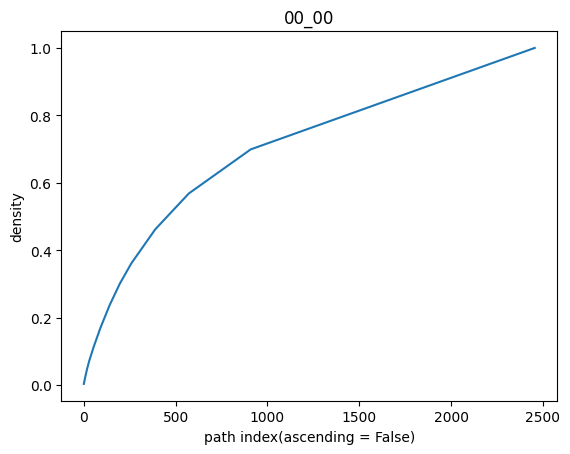

In [284]:
plt.plot(df.density)
plt.xlabel("path index(ascending = False)")
plt.ylabel("density")
# plt.title(agg5[0][6:11])

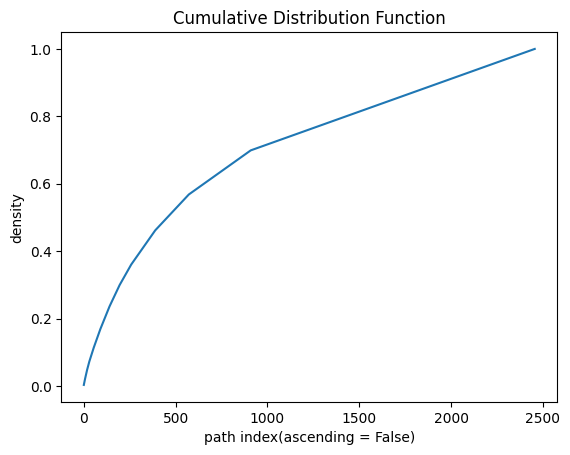

In [278]:
# CDF 그리기
plt.plot(df.level_0, df.density)
plt.xlabel("path index(ascending = False)")
plt.ylabel("density")
plt.title("Cumulative Distribution Function")
plt.show()

In [280]:
agg5 = os.listdir('tm_5_agg')
agg15 = os.listdir('tm_15_agg')
agg60 = os.listdir('tm_60_agg')

In [283]:
agg5[0][6:11]

'00_00'

In [292]:
tmp = tmp.reset_index()
tmp = tmp.reset_index()

In [293]:
tmp

,level_0,index,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed,prob,density
0,0,323,4.787136e+10,4.787298e+10,4.787142e+10,4,50.400000,0.002236,0.002236
1,1,998,5.717167e+10,5.717167e+10,5.717167e+10,4,80.438571,0.002236,0.004472
2,2,1095,5.717398e+10,5.717110e+10,5.717167e+10,4,71.917237,0.002236,0.006708
3,3,1134,5.717448e+10,5.717450e+10,5.717398e+10,4,62.600000,0.002236,0.008944
4,4,371,4.787157e+10,4.787157e+10,4.787134e+10,4,69.300000,0.002236,0.011179
...,...,...,...,...,...,...,...,...,...
1398,1398,542,4.787526e+10,4.787526e+10,4.787526e+10,1,90.175610,0.000559,0.997764
1399,1399,541,4.787525e+10,4.787121e+10,4.787010e+10,1,104.544000,0.000559,0.998323
1400,1400,539,4.787525e+10,4.787519e+10,4.787138e+10,1,54.000000,0.000559,0.998882
1401,1401,538,4.787525e+10,4.787525e+10,4.787476e+10,1,63.000000,0.000559,0.999441


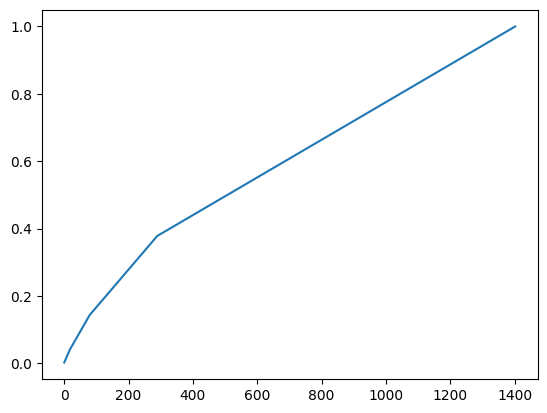

In [294]:
plt.plot(tmp.density)

In [306]:
plt.ioff()

for i in agg5[:-1]:
    tmp = pd.read_csv('tm_5_agg/' + i)
    print(i)

    tmp['prob'] = tmp['obu_id']/sum(tmp['obu_id'])
    tmp = tmp.sort_values(by='obu_id', ascending=False)
    tmp['density'] = tmp['prob'].cumsum()
    tmp = tmp.reset_index()
    tmp = tmp.reset_index()

    plt.figure()
    plt.plot(tmp.density)
    plt.xlabel("path index(ascending = False)")
    plt.ylabel("density")
    plt.title(i[6:11])
    plt.savefig('tm_5_agg_cdf/'+i[6:11]+'.png')



tm_14T00_00.csv
tm_14T00_05.csv
tm_14T00_10.csv
tm_14T00_15.csv
tm_14T00_20.csv
tm_14T00_25.csv
tm_14T00_30.csv
tm_14T00_35.csv
tm_14T00_40.csv
tm_14T00_45.csv
tm_14T00_50.csv
tm_14T00_55.csv
tm_14T01_00.csv
tm_14T01_05.csv
tm_14T01_10.csv
tm_14T01_15.csv
tm_14T01_20.csv
tm_14T01_25.csv
tm_14T01_30.csv
tm_14T01_35.csv
tm_14T01_40.csv
tm_14T01_45.csv
tm_14T01_50.csv


C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\1475387242.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


tm_14T01_55.csv
tm_14T02_00.csv
tm_14T02_05.csv
tm_14T02_10.csv
tm_14T02_15.csv
tm_14T02_20.csv
tm_14T02_25.csv
tm_14T02_30.csv
tm_14T02_35.csv
tm_14T02_40.csv
tm_14T02_45.csv
tm_14T02_50.csv
tm_14T02_55.csv
tm_14T03_00.csv
tm_14T03_05.csv
tm_14T03_10.csv
tm_14T03_15.csv
tm_14T03_20.csv
tm_14T03_25.csv
tm_14T03_30.csv
tm_14T03_35.csv
tm_14T03_40.csv
tm_14T03_45.csv
tm_14T03_50.csv
tm_14T03_55.csv
tm_14T04_00.csv
tm_14T04_05.csv
tm_14T04_10.csv
tm_14T04_15.csv
tm_14T04_20.csv
tm_14T04_25.csv
tm_14T04_30.csv
tm_14T04_35.csv
tm_14T04_40.csv
tm_14T04_45.csv
tm_14T04_50.csv
tm_14T04_55.csv
tm_14T05_00.csv
tm_14T05_05.csv
tm_14T05_10.csv
tm_14T05_15.csv
tm_14T05_20.csv
tm_14T05_25.csv
tm_14T05_30.csv
tm_14T05_35.csv
tm_14T05_40.csv
tm_14T05_45.csv
tm_14T05_50.csv
tm_14T05_55.csv
tm_14T06_00.csv
tm_14T06_05.csv
tm_14T06_10.csv
tm_14T06_15.csv
tm_14T06_20.csv
tm_14T06_25.csv
tm_14T06_30.csv
tm_14T06_35.csv
tm_14T06_40.csv
tm_14T06_45.csv
tm_14T06_50.csv
tm_14T06_55.csv
tm_14T07_00.csv
tm_14T07

In [305]:
plt.ioff()
for i in agg15[:-1]:
    tmp = pd.read_csv('tm_15_agg/' + i)
    print(i)

    tmp['prob'] = tmp['obu_id']/sum(tmp['obu_id'])
    tmp = tmp.sort_values(by='obu_id', ascending=False)
    tmp['density'] = tmp['prob'].cumsum()
    tmp = tmp.reset_index()
    tmp = tmp.reset_index()

    plt.figure()
    plt.plot(tmp.density)
    plt.xlabel("path index(ascending = False)")
    plt.ylabel("density")
    plt.title(i[6:11])
    plt.savefig('tm_15_agg_cdf/'+i[6:11]+'.png')
    plt.close()



tm_14T00_00.csv
tm_14T00_15.csv
tm_14T00_30.csv
tm_14T00_45.csv
tm_14T01_00.csv
tm_14T01_15.csv
tm_14T01_30.csv
tm_14T01_45.csv
tm_14T02_00.csv
tm_14T02_15.csv
tm_14T02_30.csv
tm_14T02_45.csv
tm_14T03_00.csv
tm_14T03_15.csv
tm_14T03_30.csv
tm_14T03_45.csv
tm_14T04_00.csv
tm_14T04_15.csv
tm_14T04_30.csv
tm_14T04_45.csv
tm_14T05_00.csv
tm_14T05_15.csv
tm_14T05_30.csv
tm_14T05_45.csv
tm_14T06_00.csv
tm_14T06_15.csv
tm_14T06_30.csv
tm_14T06_45.csv
tm_14T07_00.csv
tm_14T07_15.csv
tm_14T07_30.csv
tm_14T07_45.csv
tm_14T08_00.csv
tm_14T08_15.csv
tm_14T08_30.csv
tm_14T08_45.csv
tm_14T09_00.csv
tm_14T09_15.csv
tm_14T09_30.csv
tm_14T09_45.csv
tm_14T10_00.csv
tm_14T10_15.csv
tm_14T10_30.csv
tm_14T10_45.csv
tm_14T11_00.csv
tm_14T11_15.csv
tm_14T11_30.csv
tm_14T11_45.csv
tm_14T12_00.csv
tm_14T12_15.csv
tm_14T12_30.csv
tm_14T12_45.csv
tm_14T13_00.csv
tm_14T13_15.csv
tm_14T13_30.csv
tm_14T13_45.csv
tm_14T14_00.csv
tm_14T14_15.csv
tm_14T14_30.csv
tm_14T14_45.csv
tm_14T15_00.csv
tm_14T15_15.csv
tm_14T15

In [304]:
plt.ioff()
for i in agg60[:-1]:
    tmp = pd.read_csv('tm_60_agg/' + i)
    print(i)

    tmp['prob'] = tmp['obu_id']/sum(tmp['obu_id'])
    tmp = tmp.sort_values(by='obu_id', ascending=False)
    tmp['density'] = tmp['prob'].cumsum()
    tmp = tmp.reset_index()
    tmp = tmp.reset_index()

    plt.figure()
    plt.plot(tmp.density)
    plt.xlabel("path index(ascending = False)")
    plt.ylabel("density")
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cdf/'+i[6:11]+'.png')
    plt.close()



tm_14T00_00.csv
tm_14T01_00.csv
tm_14T02_00.csv
tm_14T03_00.csv
tm_14T04_00.csv
tm_14T05_00.csv
tm_14T06_00.csv
tm_14T07_00.csv
tm_14T08_00.csv
tm_14T09_00.csv
tm_14T10_00.csv
tm_14T11_00.csv
tm_14T12_00.csv
tm_14T13_00.csv
tm_14T14_00.csv
tm_14T15_00.csv
tm_14T16_00.csv
tm_14T17_00.csv
tm_14T18_00.csv
tm_14T19_00.csv
tm_14T20_00.csv
tm_14T21_00.csv
tm_14T22_00.csv
tm_14T23_00.csv


In [310]:
agg60

['tm_14T00_00.csv',
 'tm_14T01_00.csv',
 'tm_14T02_00.csv',
 'tm_14T03_00.csv',
 'tm_14T04_00.csv',
 'tm_14T05_00.csv',
 'tm_14T06_00.csv',
 'tm_14T07_00.csv',
 'tm_14T08_00.csv',
 'tm_14T09_00.csv',
 'tm_14T10_00.csv',
 'tm_14T11_00.csv',
 'tm_14T12_00.csv',
 'tm_14T13_00.csv',
 'tm_14T14_00.csv',
 'tm_14T15_00.csv',
 'tm_14T16_00.csv',
 'tm_14T17_00.csv',
 'tm_14T18_00.csv',
 'tm_14T19_00.csv',
 'tm_14T20_00.csv',
 'tm_14T21_00.csv',
 'tm_14T22_00.csv',
 'tm_14T23_00.csv',
 'tm_15T00_00.csv']

['tm_14T00_00.csv',
 'tm_14T01_00.csv',
 'tm_14T02_00.csv',
 'tm_14T03_00.csv',
 'tm_14T04_00.csv',
 'tm_14T05_00.csv',
 'tm_14T06_00.csv',
 'tm_14T07_00.csv',
 'tm_14T08_00.csv',
 'tm_14T09_00.csv',
 'tm_14T10_00.csv',
 'tm_14T11_00.csv',
 'tm_14T12_00.csv',
 'tm_14T13_00.csv',
 'tm_14T14_00.csv',
 'tm_14T15_00.csv',
 'tm_14T16_00.csv',
 'tm_14T17_00.csv',
 'tm_14T18_00.csv',
 'tm_14T19_00.csv',
 'tm_14T20_00.csv',
 'tm_14T21_00.csv',
 'tm_14T22_00.csv',
 'tm_14T23_00.csv',
 'tm_15T00_00.csv']

In [45]:
tm_merge['diff2'] = tm_merge['diff']/3600
tm_merge

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_hist,rc_date,rc_length,old_link_i,source,out_time2,in_time2,speed,diff,diff2
0,105020211014002115225S00,1.0,0.0,-1.000000e+00,2021-10-14 00:21:21,2021-10-14 00:21:21,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,2021-10-14 00:21:21,2021-10-14 00:21:21,NaT,0.0,0.000000
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:24,2021-10-14 00:21:22,0 days 00:01:06.666666666,2.0,0.000556
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:27,2021-10-14 00:21:25,0 days 00:01:02.500000,2.0,0.000556
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,0 days 00:01:28.235294117,3.0,0.000833
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 00:21:33,2021-10-14 00:21:32,0 days 00:00:47.619047619,1.0,0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,0 days 00:02:21.592920353,32.0,0.008889
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:49:31,2021-10-14 23:49:01,0 days 00:01:41.694915254,30.0,0.008333
8560119,105520211014225942879S00,1.0,188.0,4.778424e+10,2021-10-14 23:49:32,2021-10-14 23:49:32,31000.0,31101.0,3110151.0,477842370.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:49:32,2021-10-14 23:49:32,0 days 00:00:00,0.0,0.000000
8560120,105520211014225942879S00,1.0,189.0,4.778424e+10,2021-10-14 23:49:33,2021-10-14 23:49:34,31000.0,31101.0,3110151.0,477842365.0,...,NaN,NaN,NaN,0.0,0.0,2021-10-14 23:49:34,2021-10-14 23:49:33,0 days 00:00:08.928571428,1.0,0.000278


In [48]:
tm_merge['spd'] = tm_merge['length']/tm_merge['diff2']
tm_merge

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,speed,diff,diff2,spd
0,105020211014002115225S00,1.0,0.0,-1.000000e+00,2021-10-14 00:21:21,2021-10-14 00:21:21,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,2021-10-14 00:21:21,2021-10-14 00:21:21,NaT,0.0,0.000000,NaN
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:24,2021-10-14 00:21:22,0 days 00:01:06.666666666,2.0,0.000556,54.000
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:27,2021-10-14 00:21:25,0 days 00:01:02.500000,2.0,0.000556,57.600
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,0 days 00:01:28.235294117,3.0,0.000833,40.800
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:33,2021-10-14 00:21:32,0 days 00:00:47.619047619,1.0,0.000278,75.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,0 days 00:02:21.592920353,32.0,0.008889,25.425
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:31,2021-10-14 23:49:01,0 days 00:01:41.694915254,30.0,0.008333,35.400
8560119,105520211014225942879S00,1.0,188.0,4.778424e+10,2021-10-14 23:49:32,2021-10-14 23:49:32,31000.0,31101.0,3110151.0,477842370.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:32,2021-10-14 23:49:32,0 days 00:00:00,0.0,0.000000,inf
8560120,105520211014225942879S00,1.0,189.0,4.778424e+10,2021-10-14 23:49:33,2021-10-14 23:49:34,31000.0,31101.0,3110151.0,477842365.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:34,2021-10-14 23:49:33,0 days 00:00:08.928571428,1.0,0.000278,403.200


In [49]:
tm_merge

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,speed,diff,diff2,spd
0,105020211014002115225S00,1.0,0.0,-1.000000e+00,2021-10-14 00:21:21,2021-10-14 00:21:21,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,2021-10-14 00:21:21,2021-10-14 00:21:21,NaT,0.0,0.000000,NaN
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:24,2021-10-14 00:21:22,0 days 00:01:06.666666666,2.0,0.000556,54.000
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:27,2021-10-14 00:21:25,0 days 00:01:02.500000,2.0,0.000556,57.600
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,0 days 00:01:28.235294117,3.0,0.000833,40.800
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:33,2021-10-14 00:21:32,0 days 00:00:47.619047619,1.0,0.000278,75.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,0 days 00:02:21.592920353,32.0,0.008889,25.425
8560118,105520211014225942879S00,1.0,187.0,4.778106e+10,2021-10-14 23:49:01,2021-10-14 23:49:31,31000.0,31101.0,3110151.0,477810604.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:31,2021-10-14 23:49:01,0 days 00:01:41.694915254,30.0,0.008333,35.400
8560119,105520211014225942879S00,1.0,188.0,4.778424e+10,2021-10-14 23:49:32,2021-10-14 23:49:32,31000.0,31101.0,3110151.0,477842370.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:32,2021-10-14 23:49:32,0 days 00:00:00,0.0,0.000000,inf
8560120,105520211014225942879S00,1.0,189.0,4.778424e+10,2021-10-14 23:49:33,2021-10-14 23:49:34,31000.0,31101.0,3110151.0,477842365.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:34,2021-10-14 23:49:33,0 days 00:00:08.928571428,1.0,0.000278,403.200


In [50]:
tm_merge['spd'].describe()

count    7.339677e+06
mean              inf
std               NaN
min      1.028571e-01
25%      2.475000e+01
50%      4.567500e+01
75%      7.200000e+01
max               inf
Name: spd, dtype: float64

In [62]:
tm_merge2 = tm_merge[tm_merge['spd'].between(0,120)]
tm_merge2

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,speed,diff,diff2,spd
1,105020211014002115225S00,1.0,1.0,5.717449e+10,2021-10-14 00:21:22,2021-10-14 00:21:24,11000.0,11010.0,1101063.0,571744890.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:24,2021-10-14 00:21:22,0 days 00:01:06.666666666,2.0,0.000556,54.000000
2,105020211014002115225S00,1.0,2.0,5.717449e+10,2021-10-14 00:21:25,2021-10-14 00:21:27,11000.0,11010.0,1101063.0,571744891.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:27,2021-10-14 00:21:25,0 days 00:01:02.500000,2.0,0.000556,57.600000
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,0 days 00:01:28.235294117,3.0,0.000833,40.800000
4,105020211014002115225S00,1.0,4.0,5.717420e+10,2021-10-14 00:21:32,2021-10-14 00:21:33,11000.0,11010.0,1101063.0,571742004.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:33,2021-10-14 00:21:32,0 days 00:00:47.619047619,1.0,0.000278,75.600000
6,105020211014002115225S00,1.0,6.0,5.717441e+10,2021-10-14 00:21:34,2021-10-14 00:21:39,11000.0,11010.0,1101063.0,571744130.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:39,2021-10-14 00:21:34,0 days 00:01:24.745762711,5.0,0.001389,42.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560113,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31,0 days 00:01:38.712446351,23.0,0.006389,36.469565
8560114,105520211014225942879S00,1.0,183.0,4.778419e+10,2021-10-14 23:46:57,2021-10-14 23:47:00,31000.0,31101.0,3110154.0,477841908.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:00,2021-10-14 23:46:57,0 days 00:01:30.909090909,3.0,0.000833,39.600000
8560115,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01,0 days 00:04:27.605633802,19.0,0.005278,13.452632
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,0 days 00:02:21.592920353,32.0,0.008889,25.425000


In [63]:
link_count = tm_merge2.groupby('v_link_id')['obu_id'].count()
link_count

v_link_id
4.268000e+10      1
4.268000e+10      1
4.268002e+10      1
4.268006e+10      1
4.268008e+10      1
               ... 
9.288508e+10    369
9.288510e+10     98
9.288510e+10     65
9.288582e+10      1
9.288582e+10      1
Name: obu_id, Length: 137168, dtype: int64

In [64]:
link_mean = tm_merge2.groupby('v_link_id')['spd'].mean()
link_mean

v_link_id
4.268000e+10    108.000000
4.268000e+10     39.150000
4.268002e+10     39.272727
4.268006e+10     46.800000
4.268008e+10    115.200000
                   ...    
9.288508e+10     29.784529
9.288510e+10     28.659123
9.288510e+10     47.514037
9.288582e+10     16.526174
9.288582e+10     40.367213
Name: spd, Length: 137168, dtype: float64

In [65]:
link_count.to_csv('link_count.csv')
link_mean.to_csv('link_mean.csv')

In [71]:
tm_merge3 = tm_merge2[(tm_merge2['link_type']==1) | (tm_merge2['link_type']==32768)]
tm_merge3

,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,link_id,...,rc_date,rc_length,old_link_i,source,out_time2,in_time2,speed,diff,diff2,spd
3,105020211014002115225S00,1.0,3.0,5.717441e+10,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.0,11010.0,1101063.0,571744118.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:31,2021-10-14 00:21:28,0 days 00:01:28.235294117,3.0,0.000833,40.800000
7,105020211014002115225S00,1.0,7.0,5.717171e+10,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.0,11010.0,1101067.0,571717085.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:21:52,2021-10-14 00:21:40,0 days 00:01:40.840336134,12.0,0.003333,35.700000
8,105020211014002115225S00,1.0,8.0,5.717399e+10,2021-10-14 00:21:53,2021-10-14 00:22:02,11000.0,11010.0,1101067.0,571739932.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:22:02,2021-10-14 00:21:53,0 days 00:01:21.081081081,9.0,0.002500,44.400000
10,105020211014002115225S00,1.0,10.0,5.717047e+10,2021-10-14 00:23:00,2021-10-14 00:23:28,11000.0,11010.0,1101070.0,571704717.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:23:28,2021-10-14 00:23:00,0 days 00:01:16.086956521,28.0,0.007778,47.314286
12,105020211014002115225S00,1.0,12.0,5.717352e+10,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.0,11010.0,1101071.0,571735195.0,...,NaN,NaN,0.0,0.0,2021-10-14 00:23:39,2021-10-14 00:23:31,0 days 00:01:11.428571428,8.0,0.002222,50.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560112,105520211014225942879S00,1.0,181.0,4.778415e+10,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.0,31101.0,3110154.0,477841543.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:30,2021-10-14 23:44:59,0 days 00:47:23.750000,91.0,0.025278,1.265934
8560113,105520211014225942879S00,1.0,182.0,4.778102e+10,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.0,31101.0,3110154.0,477810194.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:46:54,2021-10-14 23:46:31,0 days 00:01:38.712446351,23.0,0.006389,36.469565
8560115,105520211014225942879S00,1.0,184.0,4.778419e+10,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.0,31101.0,3110154.0,477841912.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:47:20,2021-10-14 23:47:01,0 days 00:04:27.605633802,19.0,0.005278,13.452632
8560117,105520211014225942879S00,1.0,186.0,4.778105e+10,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.0,31101.0,3110154.0,477810507.0,...,NaN,NaN,0.0,0.0,2021-10-14 23:49:00,2021-10-14 23:48:28,0 days 00:02:21.592920353,32.0,0.008889,25.425000


In [72]:
link_mean2 = tm_merge3.groupby('v_link_id')['spd'].mean()
# link_mean

link_count2 = tm_merge3.groupby('v_link_id')['obu_id'].count()
# link_count

link_mean2

v_link_id
4.268000e+10    108.000000
4.268000e+10     39.150000
4.268002e+10     39.272727
4.268006e+10     46.800000
4.268008e+10    115.200000
                   ...    
9.288508e+10     29.784529
9.288510e+10     28.659123
9.288510e+10     47.514037
9.288582e+10     16.526174
9.288582e+10     40.367213
Name: spd, Length: 109525, dtype: float64

In [73]:
link_count2.to_csv('link_count2.csv')
link_mean2.to_csv('link_mean2.csv')

In [66]:
mc = pd.read_csv('link_mean_cnt.csv')
mc

,v_link_id,spd,cnt
0,42680004102,108.000000,1
1,42680004201,39.150000,1
2,42680017702,39.272727,1
3,42680061902,46.800000,1
4,42680076001,115.200000,1
...,...,...,...
137163,92885076102,29.784529,369
137164,92885097701,28.659123,98
137165,92885097702,47.514037,65
137166,92885820801,16.526174,1


<AxesSubplot: xlabel='spd', ylabel='cnt'>

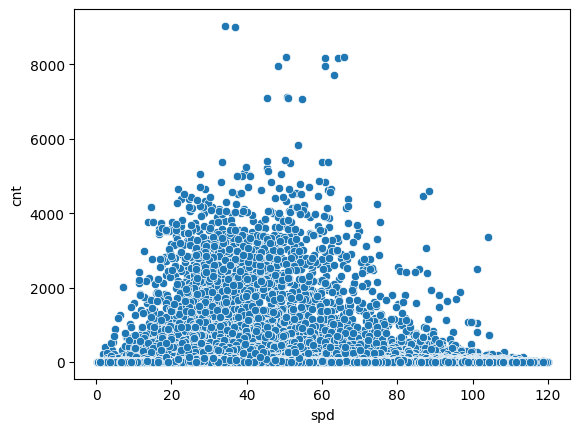

In [69]:
sns.scatterplot(y=mc['cnt'], x=mc['spd'])

In [75]:
tm_merge3['EIT']


3          2021-10-14 00:20:00
7          2021-10-14 00:20:00
8          2021-10-14 00:20:00
10         2021-10-14 00:20:00
12         2021-10-14 00:20:00
                  ...         
8560112    2021-10-14 23:40:00
8560113    2021-10-14 23:45:00
8560115    2021-10-14 23:45:00
8560117    2021-10-14 23:45:00
8560118    2021-10-14 23:45:00
Name: EIT, Length: 5088022, dtype: object

In [76]:
tm_merge3['EIT']

TypeError: '>=' not supported between instances of 'str' and 'int'

In [312]:
link

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,338700014,692901,692903,692903,692901,0,자은서부2길,0,107,32768,...,33870001401,33870001402,20201231,NaN,NaN,410.0,NaN,NaN,0,NaN
1,338700016,693771,692903,692903,693771,0,자은서부2길,0,107,32768,...,33870001601,33870001602,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
2,338700018,692904,692906,692906,692904,0,자은서부2길,0,107,32768,...,33870001801,33870001802,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
3,338700019,693771,692906,692906,693771,0,자은서부2길,0,107,32768,...,33870001901,33870001902,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
4,412300044,100923,100185,100185,100923,50,대한로140번길,0,107,32768,...,41230004401,41230004402,20171231,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648792,928849552,1719826,714994,714994,1719826,60,NaN,313,106,32768,...,92884955201,92884955202,20201231,NaN,NaN,420,NaN,NaN,468849552,2.0
648793,928849988,1740516,715032,715032,1740516,0,광덕계양로,0,107,32768,...,92884998801,92884998802,20201231,NaN,NaN,420,NaN,NaN,468849988,2.0
648794,928850761,227835,1696647,1696647,227835,0,통일로,0,104,32768,...,92885076101,92885076102,20201231,NaN,NaN,420,NaN,NaN,478850761,2.0
648795,928850977,228482,1731522,1731522,228482,60,중앙로,0,107,32768,...,92885097701,92885097702,20201231,NaN,NaN,420,NaN,NaN,478850977,2.0


In [315]:
link2 = pd.read_csv('D:/서울시신호/데이터/GIS/한양도성/한양도성진짜/lv6_link2.csv', encoding='cp949')
link2

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,47870003101,0,20211231,NaN,NaN,420.0,NaN,NaN,478700031,2
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,47870004001,47870004002,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,47870004101,47870004102,20171231,NaN,NaN,NaN,NaN,NaN,0,0
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,47870015201,47870015202,20211231,NaN,NaN,420.0,NaN,NaN,478700152,2
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,47870017501,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,900000170,900085,221715,0,0,30,NaN,0,104,516,...,90000017001,0,20181231,NaN,NaN,500.0,NaN,0.0,478749210,2
1568,900000171,563222,900085,0,0,30,NaN,0,104,516,...,90000017101,0,20181231,NaN,NaN,500.0,NaN,0.0,478749210,2
1569,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,92870152901,0,20201231,NaN,NaN,420.0,NaN,NaN,478701529,2
1570,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,92870654801,92870654802,20201231,NaN,NaN,420.0,NaN,NaN,478706548,2


In [316]:
link_1_32768 = link2[(link2['link_type']==1) | (link2['link_type']==32768)]
link_1_32768

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,47870003101,0,20211231,NaN,NaN,420.0,NaN,NaN,478700031,2
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,47870004001,47870004002,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,47870004101,47870004102,20171231,NaN,NaN,NaN,NaN,NaN,0,0
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,47870015201,47870015202,20211231,NaN,NaN,420.0,NaN,NaN,478700152,2
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,47870017501,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,571834158,614195,614197,614197,614195,30,혜화로,0,104,32768,...,57183415801,57183415802,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1566,571834175,614197,647515,647515,614197,30,혜화로,0,104,32768,...,57183417501,57183417502,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1569,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,92870152901,0,20201231,NaN,NaN,420.0,NaN,NaN,478701529,2
1570,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,92870654801,92870654802,20201231,NaN,NaN,420.0,NaN,NaN,478706548,2


In [317]:
node

,node_id,node_type,node_name,tra_light,toll_id,num_link,x,y,sido_id,sigungu_id,emd_id,m_date,rc_id,rc_hist,old_node_i
0,100185,101,동일리,0,0,3,883336.587,1472723.158,39000,39020,3902011,20171231,NaN,NaN,NaN
1,100186,101,NaN,0,0,3,880022.971,1473165.120,39000,39020,3902011,20171231,NaN,NaN,NaN
2,100189,101,대정농공단지입구,4,0,3,880712.923,1473773.753,39000,39020,3902011,20171231,NaN,NaN,NaN
3,100190,101,NaN,0,0,3,882677.497,1471602.826,39000,39020,3902011,20171231,NaN,NaN,NaN
4,100192,101,NaN,0,0,4,882935.496,1471441.060,39000,39020,3902011,20171231,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504643,1900099,109,NaN,0,0,2,1118660.966,1681718.850,38000,38115,3811564,20201231,NaN,500.0,0.0
504644,1900100,109,NaN,0,0,2,1118825.208,1681689.028,38000,38115,3811564,20201231,NaN,500.0,0.0
504645,1900101,109,NaN,0,0,2,1121141.002,1686828.032,38000,38070,3807063,20201231,NaN,500.0,0.0
504646,1900102,109,NaN,0,0,2,1118277.106,1770064.841,37000,37100,3710011,20201231,NaN,500.0,0.0


In [324]:
link_merge_up_f = pd.merge(left=link_1_32768, right=node, how='left', left_on='up_f_node', right_on='node_id')
link_merge_up_t = pd.merge(left=link_1_32768, right=node, how='left', left_on='up_t_node', right_on='node_id')
link_merge_down_f = pd.merge(left=link_1_32768, right=node, how='left', left_on='up_f_node', right_on='node_id')
link_merge_down_t = pd.merge(left=link_1_32768, right=node, how='left', left_on='up_t_node', right_on='node_id')

In [319]:
link_merge_up_f

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,num_link,x,y,sido_id_y,sigungu_id_y,emd_id_y,m_date_y,rc_id_y,rc_hist_y,old_node_i
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,3,953736.721,1951850.615,11000,11020,1102052,20211231,NaN,0.0,0.0
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,2,955523.715,1952635.036,11000,11010,1101061,20171231,NaN,NaN,NaN
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,3,955533.011,1952484.328,11000,11010,1101061,20171231,NaN,NaN,NaN
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,4,953911.200,1952909.773,11000,11010,1101061,20211231,NaN,0.0,0.0
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,4,953596.754,1952878.655,11000,11010,1101053,20171231,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,571834158,614195,614197,614197,614195,30,혜화로,0,104,32768,...,3,955787.940,1954616.776,11000,11010,1101073,20171231,NaN,NaN,NaN
872,571834175,614197,647515,647515,614197,30,혜화로,0,104,32768,...,3,955804.580,1954659.848,11000,11010,1101073,20171231,NaN,NaN,NaN
873,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,3,953969.770,1951743.053,11000,11020,1102052,20201231,NaN,NaN,NaN
874,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,5,954284.111,1953482.019,11000,11010,1101054,20201231,NaN,NaN,NaN


In [327]:
link_exp = link_1_32768.merge(node[['node_id', 'num_link']], left_on='up_f_node', right_on='node_id', how='left')
link_exp = link_exp.merge(node[['node_id', 'num_link']], left_on='up_t_node', right_on='node_id', how='left')
link_exp = link_exp.merge(node[['node_id', 'num_link']], left_on='dw_f_node', right_on='node_id', how='left')
link_exp = link_exp.merge(node[['node_id', 'num_link']], left_on='dw_t_node', right_on='node_id', how='left')

link_exp

C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\4134946520.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'num_link_x', 'node_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  link_exp = link_exp.merge(node[['node_id', 'num_link']], left_on='dw_t_node', right_on='node_id', how='left')


,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,old_link_i,source,node_id_x,num_link_x,node_id_y,num_link_y,node_id_x,num_link_x,node_id_y,num_link_y
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,478700031,2,221675,3,221676,3,NaN,NaN,NaN,NaN
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,0,0,221717,2,222809,3,222809.0,3.0,221717.0,2.0
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,0,0,221716,3,222809,3,222809.0,3.0,221716.0,3.0
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,478700152,2,221661,4,221662,4,221662.0,4.0,221661.0,4.0
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,0,0,221663,4,221664,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,571834158,614195,614197,614197,614195,30,혜화로,0,104,32768,...,0,0,614195,3,614197,3,614197.0,3.0,614195.0,3.0
872,571834175,614197,647515,647515,614197,30,혜화로,0,104,32768,...,0,0,614197,3,647515,4,647515.0,4.0,614197.0,3.0
873,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,478701529,2,1730120,3,222798,5,NaN,NaN,NaN,NaN
874,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,478706548,2,223049,5,1730123,2,1730123.0,2.0,223049.0,5.0


In [329]:
link_exp.columns

Index(['link_id', 'up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node',
       'max_speed', 'road_name', 'road_no', 'road_rank', 'link_type',
       'pavement', 'road_type', 'facil_name', 'tg_name', 'up_lanes',
       'dw_lanes', 'lanes', 'oneway', 'length', 'up_its_id', 'dw_its_id',
       'sido_id', 'sigungu_id', 'emd_id', 'up_v_link', 'dw_v_link', 'm_date',
       'rc_id', 'rc_name', 'rc_hist', 'rc_date', 'rc_length', 'old_link_i',
       'source', 'node_id_x', 'num_link_x', 'node_id_y', 'num_link_y',
       'node_id_x', 'num_link_x', 'node_id_y', 'num_link_y'],
      dtype='object')

In [333]:
rlt = link_exp[['link_id', 'up_v_link', 'dw_v_link','num_link_x', 'num_link_y',
       'num_link_x', 'num_link_y']]

In [334]:
rlt.to_csv('link_cal.csv')

In [320]:
link_merge2 = pd.merge(left=link_1_32768, right=node, how='left', left_on='up_t_node', right_on='node_id')

In [321]:
link_merge2

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,num_link,x,y,sido_id_y,sigungu_id_y,emd_id_y,m_date_y,rc_id_y,rc_hist_y,old_node_i
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,3,953787.874,1951782.106,11000,11020,1102052,20211231,NaN,300.0,NaN
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,3,955531.329,1952512.934,11000,11010,1101061,20171231,NaN,NaN,NaN
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,3,955531.329,1952512.934,11000,11010,1101061,20171231,NaN,NaN,NaN
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,4,953694.521,1952891.574,11000,11010,1101053,20211231,NaN,300.0,NaN
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,4,953579.883,1953063.997,11000,11010,1101053,20211231,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,571834158,614195,614197,614197,614195,30,혜화로,0,104,32768,...,3,955804.580,1954659.848,11000,11010,1101073,20171231,NaN,NaN,NaN
872,571834175,614197,647515,647515,614197,30,혜화로,0,104,32768,...,4,955813.417,1954731.182,11000,11010,1101073,20171231,NaN,NaN,NaN
873,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,5,954028.713,1951749.353,11000,11020,1102052,20211231,NaN,0.0,0.0
874,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,2,954417.800,1953466.610,11000,11010,1101054,20201231,NaN,NaN,NaN


In [322]:
link_merge2.columns

Index(['link_id', 'up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node',
       'max_speed', 'road_name', 'road_no', 'road_rank', 'link_type',
       'pavement', 'road_type', 'facil_name', 'tg_name', 'up_lanes',
       'dw_lanes', 'lanes', 'oneway', 'length', 'up_its_id', 'dw_its_id',
       'sido_id_x', 'sigungu_id_x', 'emd_id_x', 'up_v_link', 'dw_v_link',
       'm_date_x', 'rc_id_x', 'rc_name', 'rc_hist_x', 'rc_date', 'rc_length',
       'old_link_i', 'source', 'node_id', 'node_type', 'node_name',
       'tra_light', 'toll_id', 'num_link', 'x', 'y', 'sido_id_y',
       'sigungu_id_y', 'emd_id_y', 'm_date_y', 'rc_id_y', 'rc_hist_y',
       'old_node_i'],
      dtype='object')

In [323]:
node.columns

Index(['node_id', 'node_type', 'node_name', 'tra_light', 'toll_id', 'num_link',
       'x', 'y', 'sido_id', 'sigungu_id', 'emd_id', 'm_date', 'rc_id',
       'rc_hist', 'old_node_i'],
      dtype='object')

In [342]:
df = pd.read_csv('tm_60_agg/tm_14T17_00.csv')
df

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,44580043501.000,44580114201.000,44580114002.000,1,36.000
1,44580114002.000,44680166502.000,44680314001.000,1,61.267
2,44580114201.000,44580114002.000,44680166502.000,1,51.873
3,44680002102.000,44680032901.000,44680102901.000,1,65.778
4,44680006902.000,44680332501.000,44680331201.000,1,48.825
...,...,...,...,...,...
39578,92881099002.000,47884599501.000,47884599801.000,21,55.537
39579,92881232801.000,56881870101.000,56881870002.000,1,113.400
39580,92884234701.000,47884594902.000,47884593601.000,31,41.681
39581,92884234702.000,47886855701.000,92881099002.000,19,48.050


In [345]:
df['from_link_id'] = df['v_from_link_id']//100
df['link_id'] = df['v_link_id']//100
df['to_link_id'] = df['v_to_link_id']//100

In [346]:
df

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed,from_link_id,link_id,to_link_id
0,44580043501.000,44580114201.000,44580114002.000,1,36.000,445800435.000,445801142.000,445801140.000
1,44580114002.000,44680166502.000,44680314001.000,1,61.267,445801140.000,446801665.000,446803140.000
2,44580114201.000,44580114002.000,44680166502.000,1,51.873,445801142.000,445801140.000,446801665.000
3,44680002102.000,44680032901.000,44680102901.000,1,65.778,446800021.000,446800329.000,446801029.000
4,44680006902.000,44680332501.000,44680331201.000,1,48.825,446800069.000,446803325.000,446803312.000
...,...,...,...,...,...,...,...,...
39578,92881099002.000,47884599501.000,47884599801.000,21,55.537,928810990.000,478845995.000,478845998.000
39579,92881232801.000,56881870101.000,56881870002.000,1,113.400,928812328.000,568818701.000,568818700.000
39580,92884234701.000,47884594902.000,47884593601.000,31,41.681,928842347.000,478845949.000,478845936.000
39581,92884234702.000,47886855701.000,92881099002.000,19,48.050,928842347.000,478868557.000,928810990.000


In [349]:
df.groupby(['from_link_id', 'link_id', 'to_link_id']).agg({'obu_id':'count', 'speed':'mean'})

,,,obu_id,speed
from_link_id,link_id,to_link_id,,
445800435.000,445801142.000,445801140.000,1,36.000
445801140.000,446801665.000,446803140.000,1,61.267
445801142.000,445801140.000,446801665.000,1,51.873
446800021.000,446800329.000,446801029.000,1,65.778
446800069.000,446803325.000,446803312.000,1,48.825
...,...,...,...,...
928810990.000,478868557.000,928842347.000,1,42.565
928812328.000,568818701.000,568818700.000,1,113.400
928842347.000,478845949.000,478845936.000,1,41.681


In [350]:
df = pd.read_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_15_60_fromtolink_6leveljoin.csv')
df

C:\Users\hyorim\AppData\Local\Temp\ipykernel_22404\4245114367.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_15_60_fromtolink_6leveljoin.csv')


,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
0,0,105020211014002115225S00,1.000,3.000,57174411802.000,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.000,11010.000,1101063.000,...,0.000,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800,0,0.001,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
1,1,105020211014002115225S00,1.000,7.000,57171708502.000,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.000,11010.000,1101067.000,...,0.000,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700,0,0.003,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
2,2,105020211014002115225S00,1.000,12.000,57173519502.000,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.000,11010.000,1101071.000,...,0.000,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400,0,0.002,2021-10-14 00:23:00,2021-10-14 00:30:00,2021-10-14 00:00:00
3,3,105020211014002115225S00,1.000,17.000,57172489502.000,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975,0,0.004,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
4,4,105020211014002115225S00,1.000,18.000,57172489402.000,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800,0,0.001,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927887,4927887,105520211014225942879S00,1.000,181.000,47784154301.000,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:30,2021-10-14 23:44:59,91,1.266,23,0.025,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927888,4927888,105520211014225942879S00,1.000,182.000,47781019401.000,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.470,23,0.006,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927889,4927889,105520211014225942879S00,1.000,184.000,47784191202.000,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:47:20,2021-10-14 23:47:01,19,13.453,23,0.005,2021-10-14 23:47:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927890,4927890,105520211014225942879S00,1.000,186.000,47781050701.000,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:49:00,2021-10-14 23:48:28,32,25.425,23,0.009,2021-10-14 23:49:00,2021-10-14 23:45:00,2021-10-14 23:00:00


In [351]:
df.columns

Index(['Unnamed: 0', 'obu_id', 'grp_id', 'seq', 'v_link_id', 'in_time',
       'out_time', 'sido_id_x', 'sigungu_id_x', 'emd_id_x', 'link_id',
       'in_time_dt', 'out_time_dt', 'EIT', 'v_from_link_id', 'v_to_link_id',
       'up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node', 'max_speed',
       'road_name', 'road_no', 'road_rank', 'link_type', 'pavement',
       'road_type', 'facil_name', 'tg_name', 'up_lanes', 'dw_lanes', 'lanes',
       'oneway', 'length', 'up_its_id', 'dw_its_id', 'sido_id_y',
       'sigungu_id_y', 'emd_id_y', 'up_v_link', 'dw_v_link', 'm_date', 'rc_id',
       'rc_name', 'rc_hist', 'rc_date', 'rc_length', 'old_link_i', 'source',
       'out_time2', 'in_time2', 'diff', 'speed', 'hour', 'diff2', 'out_time3',
       'EIT15', 'EIT60'],
      dtype='object')

In [357]:
df.link_type.unique()

array([3.2768e+04, 1.0000e+00])

In [352]:
df['from_link_id'] = df['v_from_link_id']//100
df['link_id'] = df['v_link_id']//100
df['to_link_id'] = df['v_to_link_id']//100
df

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60,from_link_id,to_link_id
0,0,105020211014002115225S00,1.000,3.000,57174411802.000,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.000,11010.000,1101063.000,...,2021-10-14 00:21:28,3,40.800,0,0.001,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00,571744891.000,571742004.000
1,1,105020211014002115225S00,1.000,7.000,57171708502.000,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.000,11010.000,1101067.000,...,2021-10-14 00:21:40,12,35.700,0,0.003,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00,571744130.000,571739932.000
2,2,105020211014002115225S00,1.000,12.000,57173519502.000,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.000,11010.000,1101071.000,...,2021-10-14 00:23:31,8,50.400,0,0.002,2021-10-14 00:23:00,2021-10-14 00:30:00,2021-10-14 00:00:00,571742757.000,571745019.000
3,3,105020211014002115225S00,1.000,17.000,57172489502.000,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.000,11080.000,1108061.000,...,2021-10-14 00:24:20,16,51.975,0,0.004,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00,571743263.000,571724894.000
4,4,105020211014002115225S00,1.000,18.000,57172489402.000,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.000,11080.000,1108061.000,...,2021-10-14 00:24:37,2,37.800,0,0.001,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00,571724895.000,571717725.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927887,4927887,105520211014225942879S00,1.000,181.000,47784154301.000,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.000,31101.000,3110154.000,...,2021-10-14 23:44:59,91,1.266,23,0.025,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00,477862888.000,477810194.000
4927888,4927888,105520211014225942879S00,1.000,182.000,47781019401.000,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.000,31101.000,3110154.000,...,2021-10-14 23:46:31,23,36.470,23,0.006,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00,477841543.000,477841908.000
4927889,4927889,105520211014225942879S00,1.000,184.000,47784191202.000,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.000,31101.000,3110154.000,...,2021-10-14 23:47:01,19,13.453,23,0.005,2021-10-14 23:47:00,2021-10-14 23:45:00,2021-10-14 23:00:00,477841908.000,477810626.000
4927890,4927890,105520211014225942879S00,1.000,186.000,47781050701.000,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.000,31101.000,3110154.000,...,2021-10-14 23:48:28,32,25.425,23,0.009,2021-10-14 23:49:00,2021-10-14 23:45:00,2021-10-14 23:00:00,477810626.000,477810604.000


In [354]:
a = df[['from_link_id', 'link_id', 'to_link_id']]

In [356]:
a.drop_duplicates()

,from_link_id,link_id,to_link_id
0,571744891.000,571744118.000,571742004.000
1,571744130.000,571717085.000,571739932.000
2,571742757.000,571735195.000,571745019.000
3,571743263.000,571724895.000,571724894.000
4,571724895.000,571724894.000,571717725.000
...,...,...,...
4925558,571713968.000,571720407.000,571701844.000
4926483,572857190.000,572857184.000,572857186.000
4926675,478712650.000,478760758.000,478760859.000
4927890,477810626.000,477810507.000,477810604.000


In [358]:
b = df[['v_from_link_id', 'v_link_id', 'v_to_link_id']]

In [366]:
b.drop_duplicates().to_csv('bb.csv', index=False)

In [363]:
link2

,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,478700031,221675,221676,0,0,0,NaN,0,104,32768,...,47870003101,0,20211231,NaN,NaN,420.000,NaN,NaN,478700031,2
1,478700040,221717,222809,222809,221717,10,동순라길,0,104,32768,...,47870004001,47870004002,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2,478700041,221716,222809,222809,221716,10,동순라길,0,104,32768,...,47870004101,47870004102,20171231,NaN,NaN,NaN,NaN,NaN,0,0
3,478700152,221661,221662,221662,221661,0,사직로8길,0,104,32768,...,47870015201,47870015202,20211231,NaN,NaN,420.000,NaN,NaN,478700152,2
4,478700175,221663,221664,0,0,60,새문안로5길,0,104,32768,...,47870017501,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,900000170,900085,221715,0,0,30,NaN,0,104,516,...,90000017001,0,20181231,NaN,NaN,500.000,NaN,0.000,478749210,2
1568,900000171,563222,900085,0,0,30,NaN,0,104,516,...,90000017101,0,20181231,NaN,NaN,500.000,NaN,0.000,478749210,2
1569,928701529,1730120,222798,0,0,30,세종대로18길,0,104,32768,...,92870152901,0,20201231,NaN,NaN,420.000,NaN,NaN,478701529,2
1570,928706548,223049,1730123,1730123,223049,30,북촌로5길,0,104,32768,...,92870654801,92870654802,20201231,NaN,NaN,420.000,NaN,NaN,478706548,2


In [365]:
c = link2[['link_id','up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node', 'max_speed']]
c.to_csv('aa.csv')

In [ ]:
df = pd.read_csv('')

In [8]:
df = pd.read_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_15_60_fromtolink_6leveljoin.csv')
df

C:\Users\vpslw\AppData\Local\Temp\ipykernel_15136\4245114367.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TM_P1_POLYGON_20211014_hanyang_all_EIT_5_15_60_fromtolink_6leveljoin.csv')


,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
0,0,105020211014002115225S00,1.000,3.000,57174411802.000,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.000,11010.000,1101063.000,...,0.000,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800,0,0.001,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
1,1,105020211014002115225S00,1.000,7.000,57171708502.000,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.000,11010.000,1101067.000,...,0.000,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700,0,0.003,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
2,2,105020211014002115225S00,1.000,12.000,57173519502.000,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.000,11010.000,1101071.000,...,0.000,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400,0,0.002,2021-10-14 00:23:00,2021-10-14 00:30:00,2021-10-14 00:00:00
3,3,105020211014002115225S00,1.000,17.000,57172489502.000,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975,0,0.004,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
4,4,105020211014002115225S00,1.000,18.000,57172489402.000,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800,0,0.001,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927887,4927887,105520211014225942879S00,1.000,181.000,47784154301.000,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:30,2021-10-14 23:44:59,91,1.266,23,0.025,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927888,4927888,105520211014225942879S00,1.000,182.000,47781019401.000,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.470,23,0.006,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927889,4927889,105520211014225942879S00,1.000,184.000,47784191202.000,2021-10-14 23:47:01,2021-10-14 23:47:20,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:47:20,2021-10-14 23:47:01,19,13.453,23,0.005,2021-10-14 23:47:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927890,4927890,105520211014225942879S00,1.000,186.000,47781050701.000,2021-10-14 23:48:28,2021-10-14 23:49:00,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:49:00,2021-10-14 23:48:28,32,25.425,23,0.009,2021-10-14 23:49:00,2021-10-14 23:45:00,2021-10-14 23:00:00


In [9]:
df.columns

Index(['Unnamed: 0', 'obu_id', 'grp_id', 'seq', 'v_link_id', 'in_time',
       'out_time', 'sido_id_x', 'sigungu_id_x', 'emd_id_x', 'link_id',
       'in_time_dt', 'out_time_dt', 'EIT', 'v_from_link_id', 'v_to_link_id',
       'up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node', 'max_speed',
       'road_name', 'road_no', 'road_rank', 'link_type', 'pavement',
       'road_type', 'facil_name', 'tg_name', 'up_lanes', 'dw_lanes', 'lanes',
       'oneway', 'length', 'up_its_id', 'dw_its_id', 'sido_id_y',
       'sigungu_id_y', 'emd_id_y', 'up_v_link', 'dw_v_link', 'm_date', 'rc_id',
       'rc_name', 'rc_hist', 'rc_date', 'rc_length', 'old_link_i', 'source',
       'out_time2', 'in_time2', 'diff', 'speed', 'hour', 'diff2', 'out_time3',
       'EIT15', 'EIT60'],
      dtype='object')

In [18]:

df.groupby(['road_rank', 'max_speed'])['obu_id'].count()
# a.to_csv('roadrank_spdlimit.csv')

road_rank  max_speed
101.000    0.000         3493
           30.000          44
           40.000          87
           50.000        3239
           60.000        1095
                        ...  
107.000    70.000       22987
           80.000       21620
           90.000         388
           100.000        103
108.000    100.000          3
Name: obu_id, Length: 68, dtype: int64

In [19]:
df_30 = df[df['max_speed'] == 30]
df_40 = df[df['max_speed'] == 40]
df_50 = df[df['max_speed'] == 50]
df_60 = df[df['max_speed'] == 60]
df_70 = df[df['max_speed'] == 70]
df_80 = df[df['max_speed'] == 80]
df_90 = df[df['max_speed'] == 90]
df_100 = df[df['max_speed'] == 100]
df_30


,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
219,219,105620211014003637515S00,1.000,42.000,47872174301.000,2021-10-14 00:46:27,2021-10-14 00:46:33,11000.000,11020.000,1102052.000,...,2.000,2021-10-14 00:46:33,2021-10-14 00:46:27,6,54.000,0,0.002,2021-10-14 00:46:00,2021-10-14 00:45:00,2021-10-14 00:00:00
220,220,105620211014003637515S00,1.000,43.000,92870152901.000,2021-10-14 00:46:34,2021-10-14 00:46:39,11000.000,11020.000,1102052.000,...,2.000,2021-10-14 00:46:39,2021-10-14 00:46:34,5,42.480,0,0.001,2021-10-14 00:46:00,2021-10-14 00:45:00,2021-10-14 00:00:00
226,226,105620211014003637515S00,1.000,59.000,47871345901.000,2021-10-14 00:49:50,2021-10-14 00:50:07,11000.000,11020.000,1102057.000,...,0.000,2021-10-14 00:50:07,2021-10-14 00:49:50,17,4.659,0,0.005,2021-10-14 00:50:00,2021-10-14 00:45:00,2021-10-14 00:00:00
227,227,105620211014003637515S00,1.000,60.000,47871324801.000,2021-10-14 00:50:08,2021-10-14 00:50:17,11000.000,11020.000,1102057.000,...,0.000,2021-10-14 00:50:17,2021-10-14 00:50:08,9,4.800,0,0.003,2021-10-14 00:50:00,2021-10-14 00:45:00,2021-10-14 00:00:00
228,228,105620211014003637515S00,1.000,61.000,47871597901.000,2021-10-14 00:50:18,2021-10-14 00:50:42,11000.000,11020.000,1102057.000,...,0.000,2021-10-14 00:50:42,2021-10-14 00:50:18,24,28.950,0,0.007,2021-10-14 00:50:00,2021-10-14 00:45:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927078,4927078,108220211014234237972S00,1.000,53.000,57173731801.000,2021-10-14 23:57:32,2021-10-14 23:57:45,11000.000,11040.000,1104062.000,...,0.000,2021-10-14 23:57:45,2021-10-14 23:57:32,13,47.077,23,0.004,2021-10-14 23:57:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927423,4927423,105720211014231347367S00,1.000,76.000,47870208801.000,2021-10-14 23:32:08,2021-10-14 23:32:27,11000.000,11140.000,1114073.000,...,0.000,2021-10-14 23:32:27,2021-10-14 23:32:08,19,43.768,23,0.005,2021-10-14 23:32:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4927424,4927424,105720211014231347367S00,1.000,77.000,47870702202.000,2021-10-14 23:32:28,2021-10-14 23:32:39,11000.000,11140.000,1114073.000,...,0.000,2021-10-14 23:32:39,2021-10-14 23:32:28,11,43.855,23,0.003,2021-10-14 23:32:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4927425,4927425,105720211014231347367S00,1.000,78.000,47870290201.000,2021-10-14 23:32:40,2021-10-14 23:32:41,11000.000,11140.000,1114073.000,...,0.000,2021-10-14 23:32:41,2021-10-14 23:32:40,1,100.800,23,0.000,2021-10-14 23:32:00,2021-10-14 23:30:00,2021-10-14 23:00:00


In [20]:
df_40

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
5,5,105020211014002115225S00,1.000,20.000,57170031002.000,2021-10-14 00:24:49,2021-10-14 00:24:55,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:55,2021-10-14 00:24:49,6,48.600,0,0.002,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
6,6,105020211014002115225S00,1.000,21.000,57170034601.000,2021-10-14 00:24:56,2021-10-14 00:24:58,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:58,2021-10-14 00:24:56,2,84.600,0,0.001,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
7,7,105020211014002115225S00,1.000,22.000,57170029401.000,2021-10-14 00:24:59,2021-10-14 00:25:26,11000.000,11080.000,1108060.000,...,0.000,2021-10-14 00:25:26,2021-10-14 00:24:59,27,62.933,0,0.007,2021-10-14 00:25:00,2021-10-14 00:30:00,2021-10-14 00:00:00
8,8,105020211014002115225S00,1.000,23.000,57171194502.000,2021-10-14 00:25:27,2021-10-14 00:25:31,11000.000,11060.000,1106081.000,...,0.000,2021-10-14 00:25:31,2021-10-14 00:25:27,4,54.000,0,0.001,2021-10-14 00:25:00,2021-10-14 00:30:00,2021-10-14 00:00:00
143,143,105520211014004806382S00,1.000,109.000,47886305201.000,2021-10-14 01:14:56,2021-10-14 01:15:00,11000.000,11120.000,1112071.000,...,0.000,2021-10-14 01:15:00,2021-10-14 01:14:56,4,43.200,1,0.001,2021-10-14 01:15:00,2021-10-14 01:15:00,2021-10-14 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927598,4927598,105520211014231108769S00,1.000,10.000,47870277602.000,2021-10-14 23:14:42,2021-10-14 23:17:20,11000.000,11030.000,1103066.000,...,0.000,2021-10-14 23:17:20,2021-10-14 23:14:42,158,36.820,23,0.044,2021-10-14 23:17:00,2021-10-14 23:15:00,2021-10-14 23:00:00
4927612,4927612,105520211014231108769S00,1.000,32.000,47875396702.000,2021-10-14 23:21:53,2021-10-14 23:22:42,11000.000,11030.000,1103072.000,...,0.000,2021-10-14 23:22:42,2021-10-14 23:21:53,49,40.188,23,0.014,2021-10-14 23:22:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4927613,4927613,105520211014231108769S00,1.000,33.000,47873151601.000,2021-10-14 23:22:43,2021-10-14 23:22:45,11000.000,11030.000,1103072.000,...,0.000,2021-10-14 23:22:45,2021-10-14 23:22:43,2,18.000,23,0.001,2021-10-14 23:22:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4927614,4927614,105520211014231108769S00,1.000,34.000,47873151802.000,2021-10-14 23:22:46,2021-10-14 23:23:39,11000.000,11030.000,1103072.000,...,0.000,2021-10-14 23:23:39,2021-10-14 23:22:46,53,2.038,23,0.015,2021-10-14 23:23:00,2021-10-14 23:30:00,2021-10-14 23:00:00


In [21]:
df_50

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
702,702,108120211014003158844S00,1.000,81.000,47876075601.000,2021-10-14 00:48:52,2021-10-14 00:48:55,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 00:48:55,2021-10-14 00:48:52,3,74.400,0,0.001,2021-10-14 00:48:00,2021-10-14 00:45:00,2021-10-14 00:00:00
703,703,108120211014003158844S00,1.000,82.000,47876086301.000,2021-10-14 00:48:56,2021-10-14 00:48:58,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 00:48:58,2021-10-14 00:48:56,2,68.400,0,0.001,2021-10-14 00:48:00,2021-10-14 00:45:00,2021-10-14 00:00:00
704,704,108120211014003158844S00,1.000,83.000,47876086401.000,2021-10-14 00:48:59,2021-10-14 00:49:13,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 00:49:13,2021-10-14 00:48:59,14,72.257,0,0.004,2021-10-14 00:49:00,2021-10-14 00:45:00,2021-10-14 00:00:00
705,705,108120211014003158844S00,1.000,84.000,47876085801.000,2021-10-14 00:49:14,2021-10-14 00:49:16,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 00:49:16,2021-10-14 00:49:14,2,57.600,0,0.001,2021-10-14 00:49:00,2021-10-14 00:45:00,2021-10-14 00:00:00
706,706,108120211014003158844S00,1.000,85.000,47876075802.000,2021-10-14 00:49:17,2021-10-14 00:49:18,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 00:49:18,2021-10-14 00:49:17,1,61.200,0,0.000,2021-10-14 00:49:00,2021-10-14 00:45:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927756,4927756,105520211014225942879S00,1.000,2.000,47876075801.000,2021-10-14 23:06:49,2021-10-14 23:06:50,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 23:06:50,2021-10-14 23:06:49,1,61.200,23,0.000,2021-10-14 23:06:00,2021-10-14 23:00:00,2021-10-14 23:00:00
4927757,4927757,105520211014225942879S00,1.000,3.000,47876085901.000,2021-10-14 23:06:51,2021-10-14 23:06:54,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 23:06:54,2021-10-14 23:06:51,3,42.000,23,0.001,2021-10-14 23:06:00,2021-10-14 23:00:00,2021-10-14 23:00:00
4927758,4927758,105520211014225942879S00,1.000,4.000,47876086501.000,2021-10-14 23:06:55,2021-10-14 23:07:16,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 23:07:16,2021-10-14 23:06:55,21,48.857,23,0.006,2021-10-14 23:07:00,2021-10-14 23:00:00,2021-10-14 23:00:00
4927759,4927759,105520211014225942879S00,1.000,5.000,47876086101.000,2021-10-14 23:07:17,2021-10-14 23:07:19,11000.000,11010.000,1101061.000,...,2.000,2021-10-14 23:07:19,2021-10-14 23:07:17,2,68.400,23,0.001,2021-10-14 23:07:00,2021-10-14 23:00:00,2021-10-14 23:00:00


In [22]:
df_60

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
0,0,105020211014002115225S00,1.000,3.000,57174411802.000,2021-10-14 00:21:28,2021-10-14 00:21:31,11000.000,11010.000,1101063.000,...,0.000,2021-10-14 00:21:31,2021-10-14 00:21:28,3,40.800,0,0.001,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
1,1,105020211014002115225S00,1.000,7.000,57171708502.000,2021-10-14 00:21:40,2021-10-14 00:21:52,11000.000,11010.000,1101067.000,...,0.000,2021-10-14 00:21:52,2021-10-14 00:21:40,12,35.700,0,0.003,2021-10-14 00:21:00,2021-10-14 00:15:00,2021-10-14 00:00:00
2,2,105020211014002115225S00,1.000,12.000,57173519502.000,2021-10-14 00:23:31,2021-10-14 00:23:39,11000.000,11010.000,1101071.000,...,0.000,2021-10-14 00:23:39,2021-10-14 00:23:31,8,50.400,0,0.002,2021-10-14 00:23:00,2021-10-14 00:30:00,2021-10-14 00:00:00
3,3,105020211014002115225S00,1.000,17.000,57172489502.000,2021-10-14 00:24:20,2021-10-14 00:24:36,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:36,2021-10-14 00:24:20,16,51.975,0,0.004,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
4,4,105020211014002115225S00,1.000,18.000,57172489402.000,2021-10-14 00:24:37,2021-10-14 00:24:39,11000.000,11080.000,1108061.000,...,0.000,2021-10-14 00:24:39,2021-10-14 00:24:37,2,37.800,0,0.001,2021-10-14 00:24:00,2021-10-14 00:30:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927885,4927885,105520211014225942879S00,1.000,178.000,47784154701.000,2021-10-14 23:44:44,2021-10-14 23:44:53,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:44:53,2021-10-14 23:44:44,9,39.200,23,0.003,2021-10-14 23:44:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927886,4927886,105520211014225942879S00,1.000,179.000,47786288901.000,2021-10-14 23:44:54,2021-10-14 23:44:55,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:44:55,2021-10-14 23:44:54,1,111.600,23,0.000,2021-10-14 23:44:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927887,4927887,105520211014225942879S00,1.000,181.000,47784154301.000,2021-10-14 23:44:59,2021-10-14 23:46:30,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:30,2021-10-14 23:44:59,91,1.266,23,0.025,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927888,4927888,105520211014225942879S00,1.000,182.000,47781019401.000,2021-10-14 23:46:31,2021-10-14 23:46:54,31000.000,31101.000,3110154.000,...,0.000,2021-10-14 23:46:54,2021-10-14 23:46:31,23,36.470,23,0.006,2021-10-14 23:46:00,2021-10-14 23:45:00,2021-10-14 23:00:00


In [23]:
df_70

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
606,606,108620211014003434871S00,1.000,128.000,47885966102.000,2021-10-14 00:54:23,2021-10-14 00:54:37,11000.000,11130.000,1113062.000,...,0.000,2021-10-14 00:54:37,2021-10-14 00:54:23,14,5.914,0,0.004,2021-10-14 00:54:00,2021-10-14 01:00:00,2021-10-14 00:00:00
607,607,108620211014003434871S00,1.000,129.000,47885965702.000,2021-10-14 00:54:38,2021-10-14 00:54:45,11000.000,11130.000,1113062.000,...,0.000,2021-10-14 00:54:45,2021-10-14 00:54:38,7,6.171,0,0.002,2021-10-14 00:54:00,2021-10-14 01:00:00,2021-10-14 00:00:00
650,650,108620211014003434871S00,1.000,184.000,92880305701.000,2021-10-14 01:07:38,2021-10-14 01:07:45,11000.000,11120.000,1112071.000,...,2.000,2021-10-14 01:07:45,2021-10-14 01:07:38,7,51.943,1,0.002,2021-10-14 01:07:00,2021-10-14 01:15:00,2021-10-14 01:00:00
1014,1014,108120211014000220111S00,1.000,52.000,47870059201.000,2021-10-14 00:11:38,2021-10-14 00:12:42,11000.000,11030.000,1103064.000,...,0.000,2021-10-14 00:12:42,2021-10-14 00:11:38,64,71.550,0,0.018,2021-10-14 00:12:00,2021-10-14 00:15:00,2021-10-14 00:00:00
1123,1123,108320211014002202192S00,1.000,70.000,57166579101.000,2021-10-14 00:37:22,2021-10-14 00:37:32,11000.000,11220.000,1122067.000,...,2.000,2021-10-14 00:37:32,2021-10-14 00:37:22,10,39.600,0,0.003,2021-10-14 00:37:00,2021-10-14 00:45:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927874,4927874,105520211014225942879S00,1.000,164.000,47784324701.000,2021-10-14 23:40:39,2021-10-14 23:40:55,31000.000,31101.000,3110153.000,...,0.000,2021-10-14 23:40:55,2021-10-14 23:40:39,16,60.750,23,0.004,2021-10-14 23:40:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927875,4927875,105520211014225942879S00,1.000,165.000,47784925401.000,2021-10-14 23:40:56,2021-10-14 23:41:33,31000.000,31101.000,3110153.000,...,0.000,2021-10-14 23:41:33,2021-10-14 23:40:56,37,65.578,23,0.010,2021-10-14 23:41:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927876,4927876,105520211014225942879S00,1.000,166.000,47784947002.000,2021-10-14 23:41:34,2021-10-14 23:42:08,31000.000,31101.000,3110153.000,...,0.000,2021-10-14 23:42:08,2021-10-14 23:41:34,34,39.812,23,0.009,2021-10-14 23:42:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4927877,4927877,105520211014225942879S00,1.000,167.000,47780263901.000,2021-10-14 23:42:09,2021-10-14 23:42:12,31000.000,31101.000,3110153.000,...,0.000,2021-10-14 23:42:12,2021-10-14 23:42:09,3,39.600,23,0.001,2021-10-14 23:42:00,2021-10-14 23:45:00,2021-10-14 23:00:00


In [24]:
df_80

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
150,150,105820211014003512464S00,1.000,2.000,47870327001.000,2021-10-14 00:49:55,2021-10-14 00:50:59,11000.000,11190.000,1119056.000,...,0.000,2021-10-14 00:50:59,2021-10-14 00:49:55,64,82.462,0,0.018,2021-10-14 00:50:00,2021-10-14 00:45:00,2021-10-14 00:00:00
151,151,105820211014003512464S00,1.000,3.000,47871361501.000,2021-10-14 00:51:00,2021-10-14 00:52:39,11000.000,11190.000,1119074.000,...,1.000,2021-10-14 00:52:39,2021-10-14 00:51:00,99,64.691,0,0.028,2021-10-14 00:52:00,2021-10-14 01:00:00,2021-10-14 00:00:00
152,152,105820211014003512464S00,1.000,4.000,47870097101.000,2021-10-14 00:52:40,2021-10-14 00:53:35,11000.000,11200.000,1120068.000,...,0.000,2021-10-14 00:53:35,2021-10-14 00:52:40,55,91.178,0,0.015,2021-10-14 00:53:00,2021-10-14 01:00:00,2021-10-14 00:00:00
153,153,105820211014003512464S00,1.000,5.000,47871377501.000,2021-10-14 00:53:36,2021-10-14 00:53:54,11000.000,11190.000,1119054.000,...,0.000,2021-10-14 00:53:54,2021-10-14 00:53:36,18,89.800,0,0.005,2021-10-14 00:53:00,2021-10-14 01:00:00,2021-10-14 00:00:00
154,154,105820211014003512464S00,1.000,6.000,47875255301.000,2021-10-14 00:53:55,2021-10-14 00:54:00,11000.000,11200.000,1120072.000,...,0.000,2021-10-14 00:54:00,2021-10-14 00:53:55,5,102.960,0,0.001,2021-10-14 00:54:00,2021-10-14 01:00:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927494,4927494,108620211014233412653S00,1.000,78.000,47871258801.000,2021-10-14 23:55:15,2021-10-14 23:55:34,11000.000,11140.000,1114074.000,...,0.000,2021-10-14 23:55:34,2021-10-14 23:55:15,19,89.242,23,0.005,2021-10-14 23:55:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927495,4927495,108620211014233412653S00,1.000,79.000,47871258901.000,2021-10-14 23:55:35,2021-10-14 23:55:45,11000.000,11140.000,1114074.000,...,0.000,2021-10-14 23:55:45,2021-10-14 23:55:35,10,108.360,23,0.003,2021-10-14 23:55:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927496,4927496,108620211014233412653S00,1.000,80.000,47775878601.000,2021-10-14 23:55:46,2021-10-14 23:56:05,11000.000,11140.000,1114074.000,...,0.000,2021-10-14 23:56:05,2021-10-14 23:55:46,19,102.316,23,0.005,2021-10-14 23:56:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927497,4927497,108620211014233412653S00,1.000,81.000,47775878801.000,2021-10-14 23:56:06,2021-10-14 23:56:21,11000.000,11140.000,1114074.000,...,0.000,2021-10-14 23:56:21,2021-10-14 23:56:06,15,107.520,23,0.004,2021-10-14 23:56:00,2021-10-15 00:00:00,2021-10-14 23:00:00


In [25]:
df_90

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
2360,2360,105520211014001436551S00,1.000,91.000,47776940601.000,2021-10-14 00:33:45,2021-10-14 00:34:04,11000.000,11140.000,1114074.000,...,0.000,2021-10-14 00:34:04,2021-10-14 00:33:45,19,87.347,0,0.005,2021-10-14 00:34:00,2021-10-14 00:30:00,2021-10-14 00:00:00
2361,2361,105520211014001436551S00,1.000,92.000,47776920201.000,2021-10-14 00:34:05,2021-10-14 00:34:08,31000.000,31101.000,3110168.000,...,0.000,2021-10-14 00:34:08,2021-10-14 00:34:05,3,100.800,0,0.001,2021-10-14 00:34:00,2021-10-14 00:30:00,2021-10-14 00:00:00
2362,2362,105520211014001436551S00,1.000,93.000,47776921001.000,2021-10-14 00:34:09,2021-10-14 00:34:12,31000.000,31101.000,3110168.000,...,0.000,2021-10-14 00:34:12,2021-10-14 00:34:09,3,120.000,0,0.001,2021-10-14 00:34:00,2021-10-14 00:30:00,2021-10-14 00:00:00
2363,2363,105520211014001436551S00,1.000,100.000,47780385101.000,2021-10-14 00:35:03,2021-10-14 00:35:19,31000.000,31101.000,3110168.000,...,0.000,2021-10-14 00:35:19,2021-10-14 00:35:03,16,119.475,0,0.004,2021-10-14 00:35:00,2021-10-14 00:30:00,2021-10-14 00:00:00
2364,2364,105520211014001436551S00,1.000,102.000,47786377001.000,2021-10-14 00:35:32,2021-10-14 00:35:44,31000.000,31101.000,3110168.000,...,0.000,2021-10-14 00:35:44,2021-10-14 00:35:32,12,99.300,0,0.003,2021-10-14 00:35:00,2021-10-14 00:30:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927509,4927509,108620211014233412653S00,1.000,97.000,47784524701.000,2021-10-14 23:59:01,2021-10-14 23:59:09,31000.000,31101.000,3110168.000,...,0.000,2021-10-14 23:59:09,2021-10-14 23:59:01,8,90.900,23,0.002,2021-10-14 23:59:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927510,4927510,108620211014233412653S00,1.000,99.000,47785110401.000,2021-10-14 23:59:13,2021-10-14 23:59:21,31000.000,31101.000,3110164.000,...,0.000,2021-10-14 23:59:21,2021-10-14 23:59:13,8,102.150,23,0.002,2021-10-14 23:59:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927511,4927511,108620211014233412653S00,1.000,100.000,47785110501.000,2021-10-14 23:59:22,2021-10-14 23:59:48,31000.000,31101.000,3110164.000,...,0.000,2021-10-14 23:59:48,2021-10-14 23:59:22,26,93.185,23,0.007,2021-10-14 23:59:00,2021-10-15 00:00:00,2021-10-14 23:00:00
4927512,4927512,108620211014233412653S00,1.000,101.000,47781427401.000,2021-10-14 23:59:49,2021-10-14 23:59:53,31000.000,31101.000,3110164.000,...,0.000,2021-10-14 23:59:53,2021-10-14 23:59:49,4,105.300,23,0.001,2021-10-14 23:59:00,2021-10-15 00:00:00,2021-10-14 23:00:00


In [26]:
df_100

,Unnamed: 0,obu_id,grp_id,seq,v_link_id,in_time,out_time,sido_id_x,sigungu_id_x,emd_id_x,...,source,out_time2,in_time2,diff,speed,hour,diff2,out_time3,EIT15,EIT60
483,483,108420211014000841446S00,1.000,3.000,57235158601.000,2021-10-14 00:09:29,2021-10-14 00:10:15,31000.000,31191.000,3119153.000,...,2.000,2021-10-14 00:10:15,2021-10-14 00:09:29,46,109.096,0,0.013,2021-10-14 00:10:00,2021-10-14 00:15:00,2021-10-14 00:00:00
484,484,108420211014000841446S00,1.000,4.000,57235158501.000,2021-10-14 00:10:16,2021-10-14 00:10:21,31000.000,31191.000,3119153.000,...,2.000,2021-10-14 00:10:21,2021-10-14 00:10:16,5,116.640,0,0.001,2021-10-14 00:10:00,2021-10-14 00:15:00,2021-10-14 00:00:00
485,485,108420211014000841446S00,1.000,5.000,57240071201.000,2021-10-14 00:10:22,2021-10-14 00:10:42,31000.000,31191.000,3119153.000,...,0.000,2021-10-14 00:10:42,2021-10-14 00:10:22,20,114.840,0,0.006,2021-10-14 00:10:00,2021-10-14 00:15:00,2021-10-14 00:00:00
486,486,108420211014000841446S00,1.000,6.000,57240071501.000,2021-10-14 00:10:43,2021-10-14 00:10:58,31000.000,31191.000,3119153.000,...,0.000,2021-10-14 00:10:58,2021-10-14 00:10:43,15,108.480,0,0.004,2021-10-14 00:10:00,2021-10-14 00:15:00,2021-10-14 00:00:00
487,487,108420211014000841446S00,1.000,7.000,57245175801.000,2021-10-14 00:10:59,2021-10-14 00:12:06,31000.000,31191.000,3119153.000,...,0.000,2021-10-14 00:12:06,2021-10-14 00:10:59,67,96.824,0,0.019,2021-10-14 00:12:00,2021-10-14 00:15:00,2021-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923832,4923832,108420211014230741151S00,1.000,125.000,47784522101.000,2021-10-14 23:35:52,2021-10-14 23:36:44,31000.000,31230.000,3123012.000,...,0.000,2021-10-14 23:36:44,2021-10-14 23:35:52,52,85.915,23,0.014,2021-10-14 23:36:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4924115,4924115,105620211014232033869S00,1.000,140.000,57164822801.000,2021-10-14 23:48:18,2021-10-14 23:48:24,11000.000,11220.000,1122067.000,...,0.000,2021-10-14 23:48:24,2021-10-14 23:48:18,6,102.600,23,0.002,2021-10-14 23:48:00,2021-10-14 23:45:00,2021-10-14 23:00:00
4925117,4925117,105520211014225728194S00,1.000,92.000,57277268201.000,2021-10-14 23:30:11,2021-10-14 23:30:30,11000.000,11250.000,1125051.000,...,2.000,2021-10-14 23:30:30,2021-10-14 23:30:11,19,93.411,23,0.005,2021-10-14 23:30:00,2021-10-14 23:30:00,2021-10-14 23:00:00
4925118,4925118,105520211014225728194S00,1.000,93.000,57277268301.000,2021-10-14 23:30:31,2021-10-14 23:31:20,11000.000,11250.000,1125051.000,...,2.000,2021-10-14 23:31:20,2021-10-14 23:30:31,49,97.935,23,0.014,2021-10-14 23:31:00,2021-10-14 23:30:00,2021-10-14 23:00:00


In [27]:
tmuni = df_30['EIT60'].unique()
lens = list()
lens2 = list()

In [29]:
for i in tmuni:
    print(i)
    tmp = df_30[df_30['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_30/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)


2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 03:00:00
2021-10-14 07:00:00
2021-10-14 08:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 04:00:00
2021-10-14 09:00:00
2021-10-14 10:00:00
2021-10-14 12:00:00
2021-10-14 11:00:00
2021-10-14 15:00:00
2021-10-14 13:00:00
2021-10-14 14:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 18:00:00
2021-10-14 19:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 20:00:00
2021-10-14 23:00:00


In [30]:
tmuni = df_40['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_40[df_40['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_40/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 03:00:00
2021-10-14 07:00:00
2021-10-14 04:00:00
2021-10-14 08:00:00
2021-10-14 11:00:00
2021-10-14 10:00:00
2021-10-14 09:00:00
2021-10-14 12:00:00
2021-10-14 18:00:00
2021-10-14 13:00:00
2021-10-14 14:00:00
2021-10-14 15:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 19:00:00
2021-10-14 21:00:00
2021-10-14 20:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00
2021-10-15 00:00:00


In [31]:
tmuni = df_50['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_50[df_50['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_50/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 03:00:00
2021-10-14 08:00:00
2021-10-14 04:00:00
2021-10-14 07:00:00
2021-10-14 09:00:00
2021-10-14 11:00:00
2021-10-14 10:00:00
2021-10-14 12:00:00
2021-10-14 15:00:00
2021-10-14 13:00:00
2021-10-14 14:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 18:00:00
2021-10-14 19:00:00
2021-10-14 20:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00


In [32]:
tmuni = df_60['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_60[df_60['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_60/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 21:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 04:00:00
2021-10-14 03:00:00
2021-10-14 07:00:00
2021-10-14 08:00:00
2021-10-14 09:00:00
2021-10-14 10:00:00
2021-10-14 11:00:00
2021-10-14 13:00:00
2021-10-14 12:00:00
2021-10-14 17:00:00
2021-10-14 18:00:00
2021-10-14 14:00:00
2021-10-14 15:00:00
2021-10-14 16:00:00
2021-10-14 20:00:00
2021-10-14 19:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00
2021-10-15 00:00:00


In [33]:
tmuni = df_70['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_70[df_70['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_70/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 05:00:00
2021-10-14 02:00:00
2021-10-14 03:00:00
2021-10-14 04:00:00
2021-10-14 06:00:00
2021-10-14 08:00:00
2021-10-14 07:00:00
2021-10-14 10:00:00
2021-10-14 09:00:00
2021-10-14 11:00:00
2021-10-14 12:00:00
2021-10-14 13:00:00
2021-10-14 14:00:00
2021-10-14 15:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 18:00:00
2021-10-14 19:00:00
2021-10-14 20:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00


In [34]:
tmuni = df_80['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_80[df_80['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_80/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 03:00:00
2021-10-14 07:00:00
2021-10-14 08:00:00
2021-10-14 09:00:00
2021-10-14 04:00:00
2021-10-14 10:00:00
2021-10-14 11:00:00
2021-10-14 12:00:00
2021-10-14 13:00:00
2021-10-14 18:00:00
2021-10-14 14:00:00
2021-10-14 15:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 19:00:00
2021-10-14 20:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00
2021-10-15 00:00:00


In [35]:
tmuni = df_90['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_90[df_90['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_90/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 05:00:00
2021-10-14 03:00:00
2021-10-14 07:00:00
2021-10-14 04:00:00
2021-10-14 06:00:00
2021-10-14 08:00:00
2021-10-14 09:00:00
2021-10-14 10:00:00
2021-10-14 12:00:00
2021-10-14 11:00:00
2021-10-14 13:00:00
2021-10-14 16:00:00
2021-10-14 17:00:00
2021-10-14 15:00:00
2021-10-14 18:00:00
2021-10-14 19:00:00
2021-10-14 20:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00


In [36]:
tmuni = df_100['EIT60'].unique()
lens = list()
lens2 = list()

for i in tmuni:
    print(i)
    tmp = df_100[df_100['EIT60']==i]
    lens.append(len(tmp))
    tmp2 = tmp.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'count', 'speed':'mean'})
    lens2.append(len(tmp2))
    output_filename = 'H:/링크경로한양도성/tm_60_agg/spd_100/tm_' + str(i)[8:13] + '_' + str(i)[14:16] + '.csv'
    tmp2.to_csv(output_filename)

2021-10-14 00:00:00
2021-10-14 01:00:00
2021-10-14 02:00:00
2021-10-14 03:00:00
2021-10-14 04:00:00
2021-10-14 05:00:00
2021-10-14 06:00:00
2021-10-14 07:00:00
2021-10-14 08:00:00
2021-10-14 09:00:00
2021-10-14 10:00:00
2021-10-14 11:00:00
2021-10-14 12:00:00
2021-10-14 13:00:00
2021-10-14 14:00:00
2021-10-14 16:00:00
2021-10-14 15:00:00
2021-10-14 17:00:00
2021-10-14 18:00:00
2021-10-14 19:00:00
2021-10-14 20:00:00
2021-10-14 21:00:00
2021-10-14 22:00:00
2021-10-14 23:00:00


In [40]:
agg30 = os.listdir('tm_60_agg/spd_30')
agg40 = os.listdir('tm_60_agg/spd_40')
agg50 = os.listdir('tm_60_agg/spd_50')
agg60 = os.listdir('tm_60_agg/spd_60')
agg70 = os.listdir('tm_60_agg/spd_70')
agg80 = os.listdir('tm_60_agg/spd_80')
agg90 = os.listdir('tm_60_agg/spd_90')
agg100 = os.listdir('tm_60_agg/spd_100')


In [41]:
plt.ioff()

for i in agg30:
    tmp = pd.read_csv('tm_60_agg/spd_30/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_30/'+i[6:11]+'.png')
    plt.close()



tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [42]:
plt.ioff()

for i in agg40[:-1]:
    tmp = pd.read_csv('tm_60_agg/spd_40/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_40/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [44]:
plt.ioff()

for i in agg50:
    tmp = pd.read_csv('tm_60_agg/spd_50/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_50/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [45]:
plt.ioff()

for i in agg60[:-1]:
    tmp = pd.read_csv('tm_60_agg/spd_60/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_60/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [46]:
plt.ioff()

for i in agg70:
    tmp = pd.read_csv('tm_60_agg/spd_70/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_70/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [47]:
plt.ioff()

for i in agg80[:-1]:
    tmp = pd.read_csv('tm_60_agg/spd_80/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_80/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [48]:
plt.ioff()

for i in agg90:
    tmp = pd.read_csv('tm_60_agg/spd_90/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_90/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


In [49]:
plt.ioff()

for i in agg100:
    tmp = pd.read_csv('tm_60_agg/spd_100/' + i)
    print(i)
    plt.figure()
    plt.scatter(tmp.obu_id, tmp.speed, s=5)
    plt.xlabel('# of path traveled')
    plt.ylabel('avg. speed of path')
    plt.title(i[6:11])
    plt.savefig('tm_60_agg_cntspeed/spd_100/'+i[6:11]+'.png')
    plt.close()

tm_14 00_00.csv
tm_14 01_00.csv
tm_14 02_00.csv
tm_14 03_00.csv
tm_14 04_00.csv
tm_14 05_00.csv
tm_14 06_00.csv
tm_14 07_00.csv
tm_14 08_00.csv
tm_14 09_00.csv
tm_14 10_00.csv
tm_14 11_00.csv
tm_14 12_00.csv
tm_14 13_00.csv
tm_14 14_00.csv
tm_14 15_00.csv
tm_14 16_00.csv
tm_14 17_00.csv
tm_14 18_00.csv
tm_14 19_00.csv
tm_14 20_00.csv
tm_14 21_00.csv
tm_14 22_00.csv
tm_14 23_00.csv


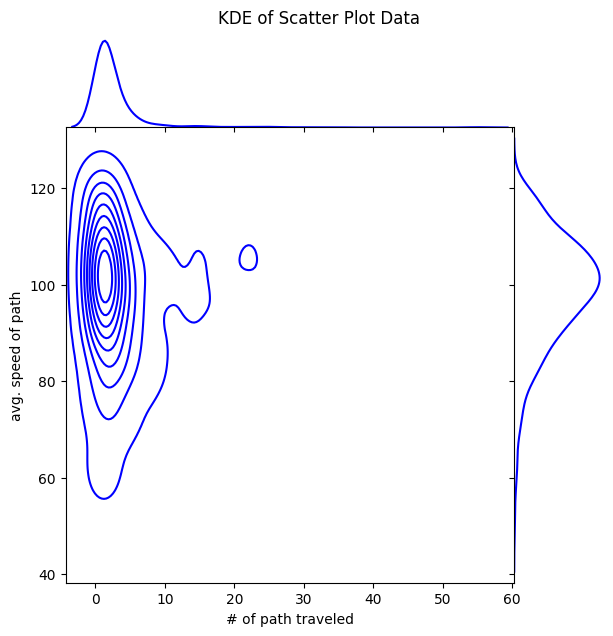

평균: 98.66512518145325
표준편차: 11.553831944086769
왜도: -0.7784167774799744
첨도: 1.0283286595143126


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 샘플 데이터 (이 부분을 실제 데이터로 대체해주세요)
x = np.array(tmp['obu_id']) # # of path traveled
y = np.array(tmp['speed']) # avg. speed of path

# KDE plot 그리기
sns.jointplot(x=x, y=y, kind="kde", space=0, color="b")
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.suptitle('KDE of Scatter Plot Data', y=1.02)
plt.show()

# 기초 통계 값 출력
print(f"평균: {np.mean(y)}")
print(f"표준편차: {np.std(y)}")
print(f"왜도: {skew(y)}")
print(f"첨도: {kurtosis(y)}")


c:\Users\vpslw\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\vpslw\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


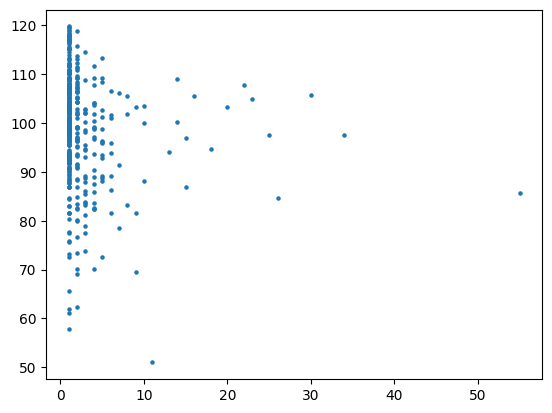

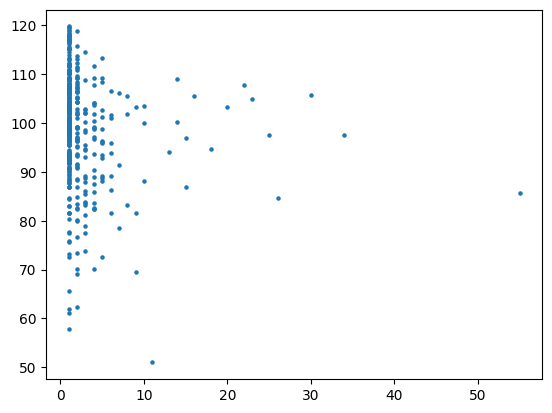

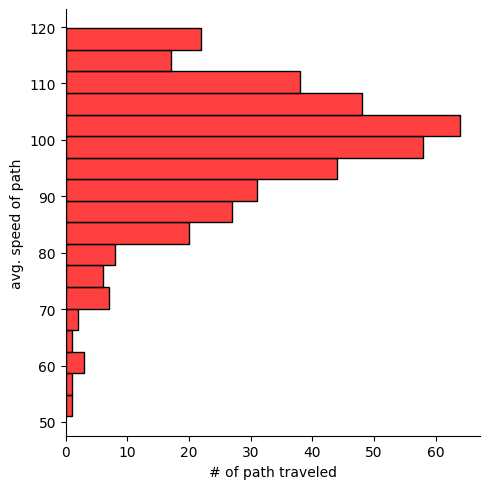

평균: 98.66512518145325
표준편차: 11.553831944086769
왜도: -0.7784167774799744
첨도: 1.0283286595143126


In [72]:
plt.figure()
plt.scatter(tmp.obu_id, tmp.speed, s=5)
sns.displot(y=tmp.speed, color="r", ax=plt.gca())
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.show()

print(f"평균: {np.mean(y)}")
print(f"표준편차: {np.std(y)}")
print(f"왜도: {skew(y)}")
print(f"첨도: {kurtosis(y)}")

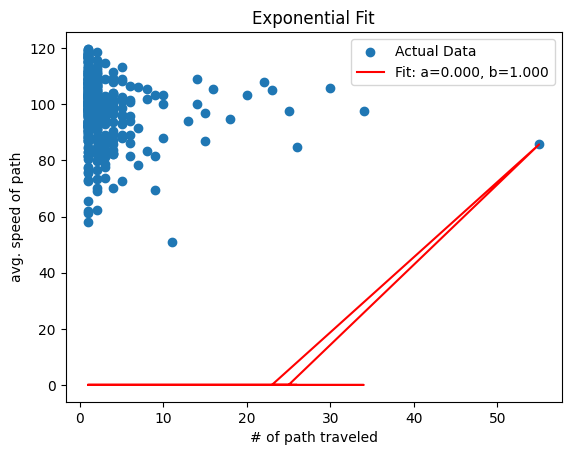

a: 1.104703800429287e-22
b: 1.0001528274587719


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 샘플 데이터 (이 부분을 실제 데이터로 대체해주세요)
x = np.array(tmp['obu_id']) # # of path traveled
y = np.array(tmp['speed']) # avg. speed of path

# 지수함수 정의
def exp_func(x, a, b):
    return a * np.exp(b * x)

# curve_fit을 사용하여 파라미터 추정
params, covariance = curve_fit(exp_func, x, y)
a, b = params

# 산점도 그리기
plt.scatter(x, y, label='Actual Data')

# 지수함수로 근사한 그래프 그리기
plt.plot(x, exp_func(x, *params), 'r-', label='Fit: a=%5.3f, b=%5.3f' % tuple(params))

plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('Exponential Fit')
plt.legend()
plt.show()

# 파라미터 값 출력
print(f"a: {a}")
print(f"b: {b}")


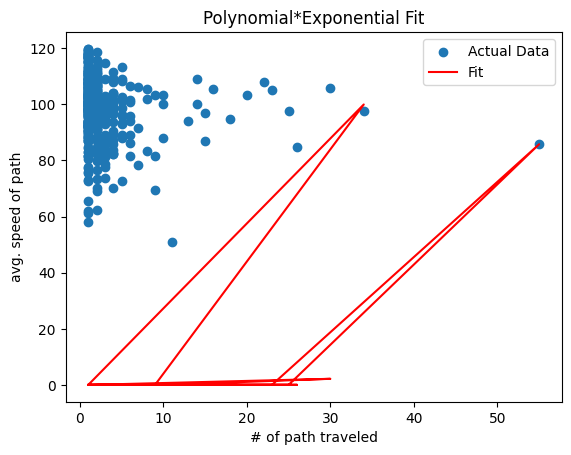

b: -8.15961604945986e-15
c: 4.4877888283180535e-13
d: 0.9999956435330107


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 샘플 데이터 (이 부분을 실제 데이터로 대체해주세요)
x = np.array(tmp['obu_id']) # # of path traveled
y = np.array(tmp['speed']) # avg. speed of path

# 다항*지수 함수 정의
def poly_exp_func(x, b, c, d):
    return (b * x + c) * np.exp(d * x)

# curve_fit을 사용하여 파라미터 추정
params, covariance = curve_fit(poly_exp_func, x, y)
b, c, d = params

# 산점도 그리기
plt.scatter(x, y, label='Actual Data')

# 다항*지수 함수로 근사한 그래프 그리기
plt.plot(x, poly_exp_func(x, *params), 'r-', label='Fit')

plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('Polynomial*Exponential Fit')
plt.legend()
plt.show()

# 파라미터 값 출력
# print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")


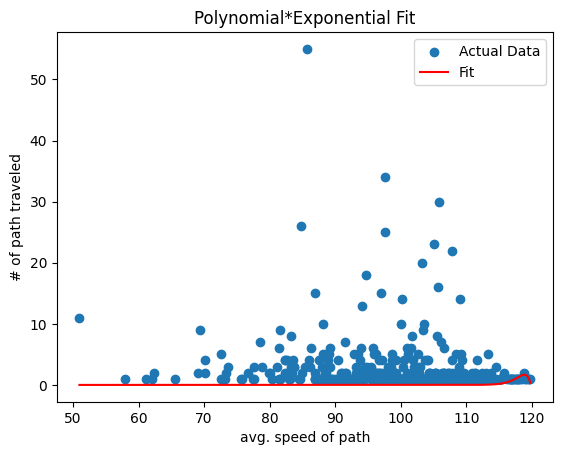

b: -4.0757425813229444e-52
c: 4.884449619443738e-50
d: 1.0000001613346243


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 샘플 데이터 (이 부분을 실제 데이터로 대체해주세요)
y = np.array(tmp['obu_id']) # # of path traveled
x = np.array(tmp['speed']) # avg. speed of path

# 다항*지수 함수 정의
def poly_exp_func(x, b, c, d):
    return (b * x + c) * np.exp(d * x)

# 초기 추정값
initial_guess = [1, 1, 1]

# curve_fit을 사용하여 파라미터 추정 (maxfev 값을 늘림)
params, covariance = curve_fit(poly_exp_func, x, y, maxfev=5000)
b, c, d = params

# 산점도 그리기 (x와 y의 위치를 변경)
plt.scatter(x, y, label='Actual Data')

# 다항*지수 함수로 근사한 그래프 그리기 (x와 y의 위치를 변경)
x_vals = np.linspace(min(x), max(x), 400)
plt.plot(x_vals, poly_exp_func(x_vals, *params), 'r-', label='Fit')

plt.xlabel('avg. speed of path')
plt.ylabel('# of path traveled')
plt.title('Polynomial*Exponential Fit')
plt.legend()
plt.show()

# 파라미터 값 출력
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")


In [89]:
import numpy as np
import plotly.express as px
from statsmodels.nonparametric.smoothers_lowess import lowess

# 샘플 데이터 (이 부분을 실제 데이터로 대체해주세요)
x = np.array(tmp['speed'])  # avg. speed of path
y = np.array(tmp['obu_id'])  # # of path traveled

# LOWESS 추세선 계산
lowess_results = lowess(y, x)

# plotly로 원래 데이터와 LOWESS 추세선 그리기
fig = px.scatter(x=x, y=y, trendline='lowess')
fig.add_traces(px.line(x=lowess_results[:, 0], y=lowess_results[:, 1], labels={'x': 'avg. speed of path', 'y': '# of path traveled'}).data)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [92]:
px.scatter(tmp, x='obu_id', y='speed', trendline='lowess')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'speed=%{x}<br>obu_id=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 99.9       , 100.32244898,  98.82580645, ..., 104.7       ,
                          103.11428571,  96.56283186]),
              'xaxis': 'x',
              'y': array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>LOWESS trendline</b><br><br' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 50.99051449,  57.9375    ,  61.2       , ..., 119.35384615,
                          119.61509434, 119.76521739]),
              'xaxis': 'x',
              'y': array([1.71278448, 1.78316653, 1.80660608, ..., 1.09843701, 1.09397022,
                          1.09139231]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'speed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'obu_id'}}}
})

In [11]:
df_agg = pd.DataFrame({"spd_limit":[], "time_zone":[], "path_skew":[], "path_kurt":[], "spd_skew":[], "spd_kurt":[]})
df_agg

,spd_limit,time_zone,path_skew,path_kurt,spd_skew,spd_kurt


In [22]:
df30 = pd.read_csv('tm_60_agg/spd_60/tm_14 18_00.csv')
df30

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,44822304101.000,44822305601.000,44822305502.000,1,36.450
1,44822305502.000,44822304901.000,44822304401.000,1,4.800
2,44822305601.000,44822305502.000,44822304901.000,1,11.520
3,44823118001.000,44822042402.000,44822304101.000,1,26.640
4,45641546701.000,45641545802.000,45641213502.000,1,44.486
...,...,...,...,...,...
16204,92875365501.000,47875365602.000,47875225502.000,9,32.987
16205,92875365502.000,47871362602.000,47884689902.000,10,46.729
16206,92880305702.000,47881069701.000,47885453701.000,1,2.043
16207,92880305702.000,47881069701.000,47885855801.000,1,50.400


In [12]:
df30.describe()

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
count,5422.000,5422.000,5422.000,5422.000,5422.000
mean,52608097710.821,52572722054.570,52627446516.648,5.818,48.355
std,5166917089.029,5051006932.922,5250298875.594,11.142,23.218
min,47461906701.000,47461910901.000,47461906701.000,1.000,0.298
25%,47871323351.750,47871314301.000,47871337501.000,1.000,32.400
50%,48716325001.500,48715767801.500,48716130651.000,1.000,48.374
75%,57172449976.250,57172167652.000,57172480901.750,5.000,62.400
max,92875365502.000,92871379702.000,92875365502.000,141.000,118.800


In [23]:
df30.obu_id.skew()

5.195237314504428

In [25]:
df30.obu_id.kurtosis()

32.33567855723294

In [26]:
i = 'tm_14 18_00.csv'
i[-9:-7]

'18'

In [27]:
spd_60 = os.listdir('tm_60_agg/spd_60/')
spd_60

['tm_14 00_00.csv',
 'tm_14 01_00.csv',
 'tm_14 02_00.csv',
 'tm_14 03_00.csv',
 'tm_14 04_00.csv',
 'tm_14 05_00.csv',
 'tm_14 06_00.csv',
 'tm_14 07_00.csv',
 'tm_14 08_00.csv',
 'tm_14 09_00.csv',
 'tm_14 10_00.csv',
 'tm_14 11_00.csv',
 'tm_14 12_00.csv',
 'tm_14 13_00.csv',
 'tm_14 14_00.csv',
 'tm_14 15_00.csv',
 'tm_14 16_00.csv',
 'tm_14 17_00.csv',
 'tm_14 18_00.csv',
 'tm_14 19_00.csv',
 'tm_14 20_00.csv',
 'tm_14 21_00.csv',
 'tm_14 22_00.csv',
 'tm_14 23_00.csv',
 'tm_15 00_00.csv']

In [28]:
time = []
path_skews = []
path_kurts = []
spd_skews = []
spd_kurts = []

In [113]:
tmp.speed.mean()
tmp.speed.std()

23.04495773721356

In [114]:
tmp2 = pd.DataFrame()
time = []
path_skews = []
path_kurts = []
spd_skews = []
spd_kurts = []
average = []
std = []

for i in spd_60[:-1]:
    tmp = pd.read_csv('tm_60_agg/spd_60/' + i)
    average.append(tmp.speed.mean())
    std.append(tmp.speed.std())
    # time.append(i[-9:-7])

    # path_skews.append(tmp.obu_id.skew())
    # path_kurts.append(tmp.obu_id.kurtosis())

    # spd_skews.append(tmp.speed.skew())
    # spd_kurts.append(tmp.speed.kurtosis())

# tmp2 = pd.DataFrame({"spd_limit":60, "time_zone":time, "path_skew":path_skews, "path_kurt":path_kurts, "spd_skew":spd_skews, "spd_kurt":spd_kurts})
# df_agg = pd.concat([df_agg, tmp2])

df_agg['mean'] = average
df_agg['std'] = std

In [115]:
df_agg

,spd_limit,time_zone,path_skew,path_kurt,spd_skew,spd_kurt,gmm_results,mean,std
0,60.000,00,4.466,29.538,0.321,0.054,1,48.355,23.218
1,60.000,01,3.800,18.392,0.261,-0.105,2,49.175,23.674
2,60.000,02,3.193,12.930,0.221,-0.159,2,51.237,24.160
3,60.000,03,3.659,16.655,0.200,-0.140,2,51.289,23.989
4,60.000,04,3.356,14.131,0.205,-0.130,2,50.656,23.605
5,60.000,05,5.893,48.342,0.331,-0.013,3,48.729,23.789
6,60.000,06,6.762,59.902,0.467,0.160,0,45.402,22.894
7,60.000,07,5.740,43.362,0.656,0.332,3,40.675,22.893
8,60.000,08,5.990,46.906,0.716,0.351,3,38.167,23.134
9,60.000,09,5.924,46.950,0.679,0.348,3,39.320,22.747


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

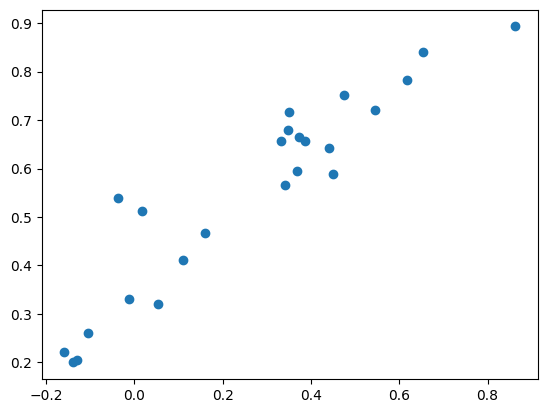

In [34]:
plt.scatter(df_agg['spd_kurt'], df_agg['spd_skew'])

C:\Users\hyorim\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyorim\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyorim\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyorim\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyorim\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyorim\AppData\Roaming\Python\Pyth

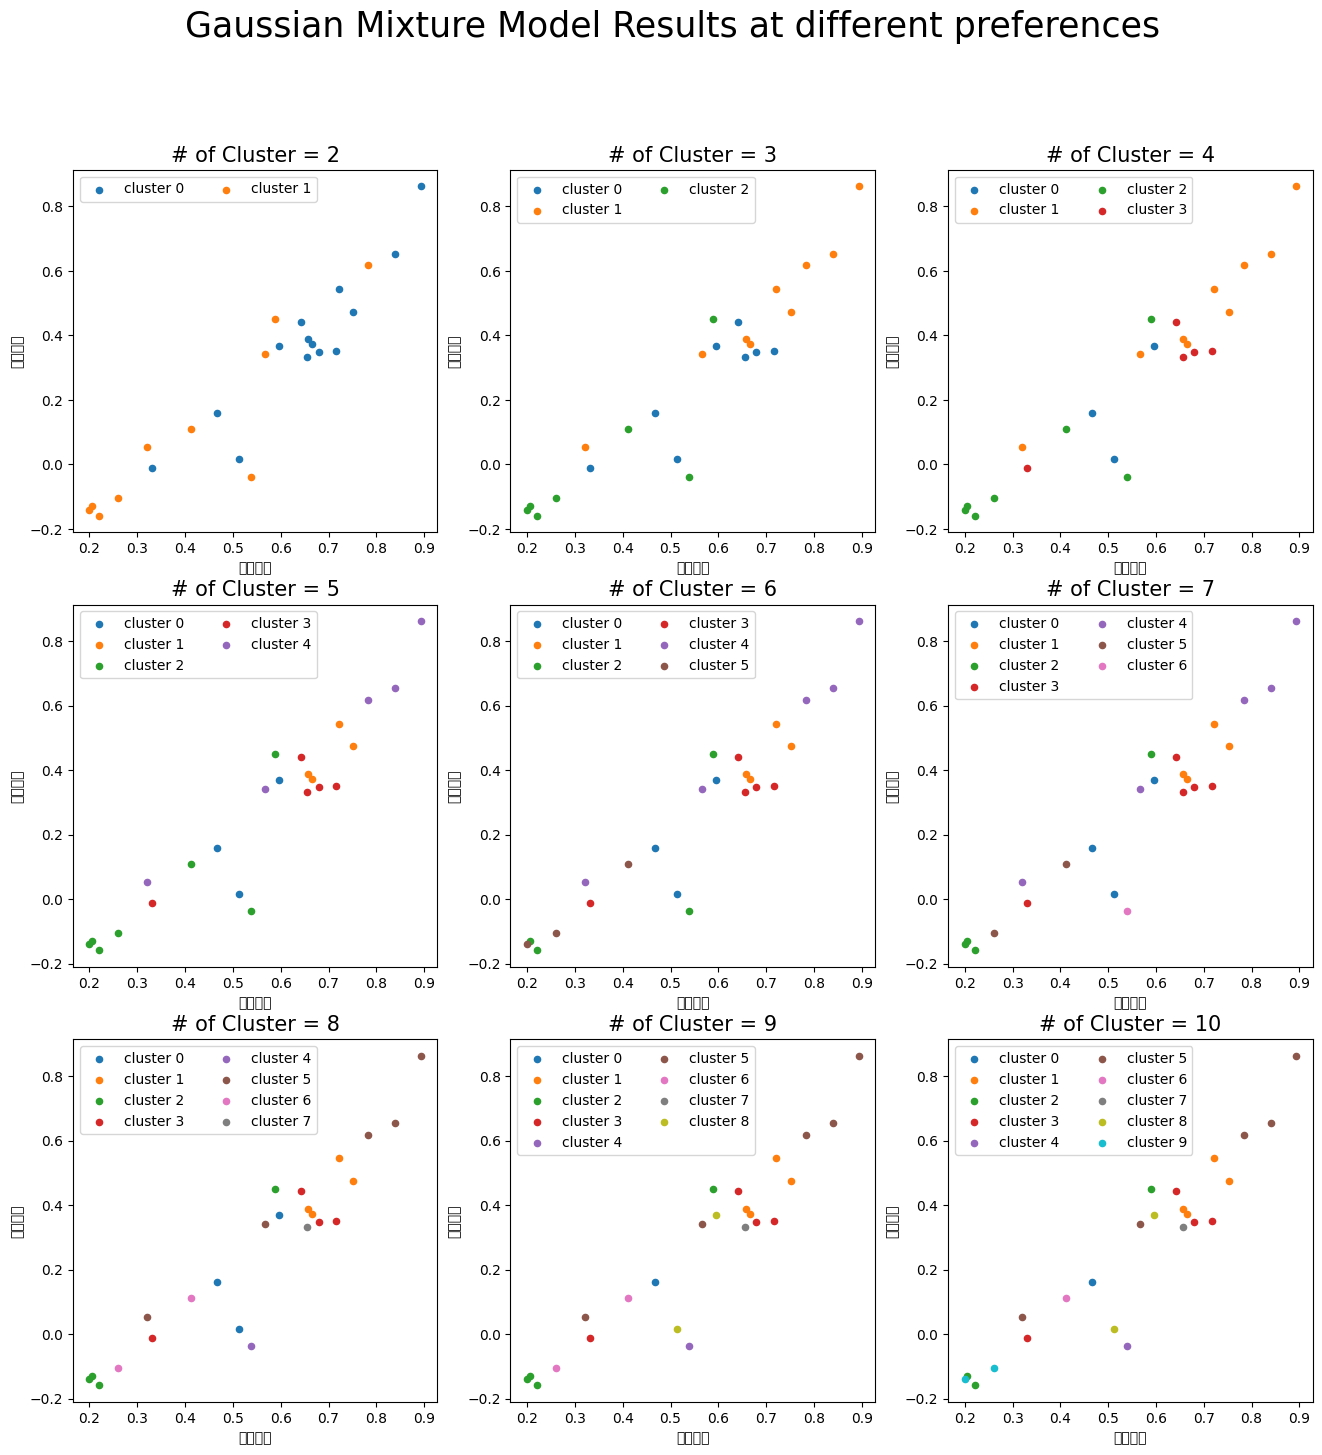

In [35]:
from sklearn.mixture import GaussianMixture

# 다중 플롯 동시 시각화
f, ax = plt.subplots(3,3)
f.set_size_inches((16, 16))

plt.suptitle('Gaussian Mixture Model Results at different preferences', size=25)

for i in range(9):
    # 군집화 및 시각화 과정 자동화
    gmm = GaussianMixture(n_components=i+2, random_state=42)
    gmm.fit_predict(df_agg[['spd_kurt', 'spd_skew', 'path_kurt', 'path_skew']])

    df_agg['gmm_results'] = gmm.fit_predict(df_agg[['spd_kurt', 'spd_skew', 'path_kurt', 'path_skew']])

    for j in range(df_agg['gmm_results'].max() + 1):
        ax[i // 3, i % 3].scatter(df_agg.loc[df_agg['gmm_results'] == j, 'spd_skew'], df_agg.loc[df_agg['gmm_results'] == j, 'spd_kurt'], 
                        label = 'cluster ' + str(j), s=20)

    ax[i // 3, i % 3].legend(loc='upper left', ncol=2, fontsize=10)
    ax[i // 3, i % 3].set_title('# of Cluster = {}'.format(i+2), size=15)
    ax[i // 3, i % 3].set_xlabel('사고건수')
    ax[i // 3, i % 3].set_ylabel('사망자수')

In [84]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit_predict(df_agg[['spd_kurt', 'spd_skew', 'path_kurt', 'path_skew']])

df_agg['gmm_results'] = gmm.fit_predict(df_agg[['spd_kurt', 'spd_skew', 'path_kurt', 'path_skew']])


In [85]:
df_agg

,spd_limit,time_zone,path_skew,path_kurt,spd_skew,spd_kurt,gmm_results
0,60.000,00,4.466,29.538,0.321,0.054,1
1,60.000,01,3.800,18.392,0.261,-0.105,2
2,60.000,02,3.193,12.930,0.221,-0.159,2
3,60.000,03,3.659,16.655,0.200,-0.140,2
4,60.000,04,3.356,14.131,0.205,-0.130,2
5,60.000,05,5.893,48.342,0.331,-0.013,3
6,60.000,06,6.762,59.902,0.467,0.160,0
7,60.000,07,5.740,43.362,0.656,0.332,3
8,60.000,08,5.990,46.906,0.716,0.351,3
9,60.000,09,5.924,46.950,0.679,0.348,3


In [42]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

In [43]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [44]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [45]:
os.getcwd()

'J:\\링크경로한양도성'

In [55]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [51]:
from PIL import Image
import numpy as np
import os

images = []
image_directory = "tm_60_agg_cntspeed/spd_60/"  # 여러분의 이미지 디렉토리 경로로 변경해주세요.

# 디렉토리 내의 모든 이미지 파일을 불러옵니다.
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # 다른 확장자도 추가 가능
        img_path = os.path.join(image_directory, filename)
        with Image.open(img_path) as img:
            img_array = np.array(img)
            images.append(img_array)

images = np.array(images)


In [62]:
# CNN 모델 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())

# 모델을 통해 이미지에서 특징 추출
features = model.predict(images)



1/1 [==============================] - 0s 364ms/step


In [95]:
len(df_agg.spd_kurt)

24

In [101]:
features

array([[21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       ...,
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ]], dtype=float32)

In [105]:
path_skew

array([4.46580559, 3.79993543, 3.19308888, 3.65879453, 3.35569683,
       5.89298724, 6.76185749, 5.73992247, 5.98955569, 5.92415762,
       5.35896417, 5.2900254 , 6.46249506, 3.16979164, 2.09208042,
       4.98503306, 5.36931173, 5.20652432, 5.19523731, 5.68286339,
       5.90926348, 6.46343066, 4.98046596, 4.16992679])

In [121]:
path_skew = np.array(df_agg.path_skew)
path_kurt = np.array(df_agg.path_kurt)
spd_skew = np.array(df_agg.spd_skew)
spd_kurt = np.array(df_agg.spd_kurt)
mean = np.array(df_agg['mean'])
std = np.array(df_agg['std'])

# path_kurt	spd_skew	spd_kurt/

In [120]:
mean

array(<bound method NDFrame._add_numeric_operations.<locals>.mean of     spd_limit time_zone  path_skew  path_kurt  spd_skew  spd_kurt  \
0      60.000        00      4.466     29.538     0.321     0.054   
1      60.000        01      3.800     18.392     0.261    -0.105   
2      60.000        02      3.193     12.930     0.221    -0.159   
3      60.000        03      3.659     16.655     0.200    -0.140   
4      60.000        04      3.356     14.131     0.205    -0.130   
5      60.000        05      5.893     48.342     0.331    -0.013   
6      60.000        06      6.762     59.902     0.467     0.160   
7      60.000        07      5.740     43.362     0.656     0.332   
8      60.000        08      5.990     46.906     0.716     0.351   
9      60.000        09      5.924     46.950     0.679     0.348   
10     60.000        10      5.359     34.729     0.666     0.373   
11     60.000        11      5.290     36.211     0.657     0.387   
12     60.000        12      6.462

In [106]:
combined_features = np.hstack([features, path_skew.reshape(-1,1), path_kurt.reshape(-1,1)
                               , spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1)])

In [122]:
combined_features2 = np.hstack([features, path_skew.reshape(-1,1), path_kurt.reshape(-1,1)
                               , spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1), 
                               mean.reshape(-1,1), std.reshape(-1,1)])

In [131]:
combined_features3 = np.hstack([features, spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1), 
                               mean.reshape(-1,1), std.reshape(-1,1)])

In [87]:
features

array([[21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       ...,
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ],
       [21.930063,  0.      ,  0.      , ...,  0.      , 36.44663 ,
         0.      ]], dtype=float32)

In [134]:
# KMeans를 사용하여 군집a화(feature + 왜도첨도)

n_clusters = 6  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(combined_features3)

In [135]:
clustered

array([1, 1, 4, 4, 4, 1, 1, 0, 3, 3, 5, 3, 2, 2, 2, 3, 3, 5, 5, 3, 0, 0,
       0, 0])

In [86]:
# KMeans를 사용하여 군집a화
n_clusters = 5  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(features)


In [71]:
clustered

array([2, 2, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 4,
       4, 4])

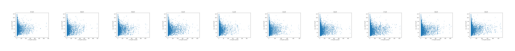

In [80]:
# 결과 시각화 (예: 첫 번째 군집의 이미지들을 출력)
cluster_num = 0
cluster_images = images[clustered == cluster_num]
for i in range(len(cluster_images)):
    plt.subplot(1, len(cluster_images), i + 1)
    plt.imshow(cluster_images[i])
    plt.axis('off')
plt.show()
plt.close()

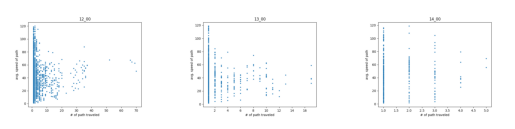

In [79]:
cluster_num = 1
cluster_images = images[clustered == cluster_num]
for i in range(len(cluster_images)):
    plt.subplot(1, len(cluster_images), i + 1)
    plt.imshow(cluster_images[i])
    plt.axis('off')
plt.show()
plt.close()

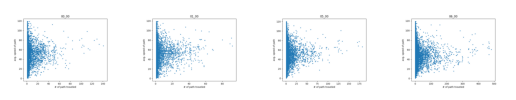

In [78]:
cluster_num = 2
cluster_images = images[clustered == cluster_num]
for i in range(len(cluster_images)):
    plt.subplot(1, len(cluster_images), i + 1)
    plt.imshow(cluster_images[i])
    plt.axis('off')
plt.show()
plt.close()

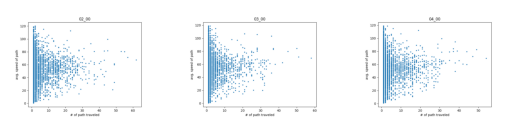

In [77]:
cluster_num = 3
cluster_images = images[clustered == cluster_num]
for i in range(len(cluster_images)):
    plt.subplot(1, len(cluster_images), i + 1)
    plt.imshow(cluster_images[i])
    plt.axis('off')
plt.show()
plt.close()

In [83]:
# GMM을 사용하여 군집화
n_clusters = 4  # 원하는 군집의 개수로 설정
gmm = GaussianMixture(n_clusters, random_state=42)
clustered_gmm = gmm.fit_predict(features)

clustered_gmm


MemoryError: Unable to allocate 156. TiB for an array with shape (4, 2316288, 2316288) and data type float64

In [136]:
df_agg2 = pd.DataFrame({"spd_limit":[], "time_zone":[], "path_skew":[], "path_kurt":[], "spd_skew":[], "spd_kurt":[]})
df_agg2

,spd_limit,time_zone,path_skew,path_kurt,spd_skew,spd_kurt


In [138]:
spd_80 = os.listdir('tm_60_agg/spd_80/')
spd_80

['tm_14 00_00.csv',
 'tm_14 01_00.csv',
 'tm_14 02_00.csv',
 'tm_14 03_00.csv',
 'tm_14 04_00.csv',
 'tm_14 05_00.csv',
 'tm_14 06_00.csv',
 'tm_14 07_00.csv',
 'tm_14 08_00.csv',
 'tm_14 09_00.csv',
 'tm_14 10_00.csv',
 'tm_14 11_00.csv',
 'tm_14 12_00.csv',
 'tm_14 13_00.csv',
 'tm_14 14_00.csv',
 'tm_14 15_00.csv',
 'tm_14 16_00.csv',
 'tm_14 17_00.csv',
 'tm_14 18_00.csv',
 'tm_14 19_00.csv',
 'tm_14 20_00.csv',
 'tm_14 21_00.csv',
 'tm_14 22_00.csv',
 'tm_14 23_00.csv',
 'tm_15 00_00.csv']

In [139]:
tmp2 = pd.DataFrame()
time = []
path_skews = []
path_kurts = []
spd_skews = []
spd_kurts = []
average = []
std = []

for i in spd_80[:-1]:
    tmp = pd.read_csv('tm_60_agg/spd_80/' + i)
    average.append(tmp.speed.mean())
    std.append(tmp.speed.std())
    time.append(i[-9:-7])

    path_skews.append(tmp.obu_id.skew())
    path_kurts.append(tmp.obu_id.kurtosis())

    spd_skews.append(tmp.speed.skew())
    spd_kurts.append(tmp.speed.kurtosis())

tmp2 = pd.DataFrame({"spd_limit":60, "time_zone":time, "path_skew":path_skews, 
                     "path_kurt":path_kurts, "spd_skew":spd_skews, "spd_kurt":spd_kurts,
                     "mean":average, "std":std})

df_agg2 = pd.concat([df_agg2, tmp2])


In [140]:
df_agg2

,spd_limit,time_zone,path_skew,path_kurt,spd_skew,spd_kurt,mean,std
0,60.000,00,4.783,27.991,-1.317,2.599,80.282,20.848
1,60.000,01,3.580,14.838,-1.150,1.832,80.648,21.073
2,60.000,02,3.946,18.945,-1.072,1.807,81.795,20.735
3,60.000,03,3.925,17.765,-0.795,1.126,78.054,20.594
4,60.000,04,3.268,11.925,-1.078,1.767,80.483,20.982
5,60.000,05,5.929,40.762,-0.845,1.107,77.267,21.790
6,60.000,06,6.959,54.241,-0.567,-0.078,72.263,24.815
7,60.000,07,7.161,58.495,-0.399,-0.701,67.793,28.476
8,60.000,08,7.485,65.471,-0.451,-0.713,68.534,29.156
9,60.000,09,7.561,64.658,-0.403,-0.583,67.572,27.592


In [151]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [143]:
from PIL import Image
import numpy as np
import os

images = []
image_directory = "tm_60_agg_cntspeed/spd_80/"  # 여러분의 이미지 디렉토리 경로로 변경해주세요.

# 디렉토리 내의 모든 이미지 파일을 불러옵니다.
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # 다른 확장자도 추가 가능
        img_path = os.path.join(image_directory, filename)
        with Image.open(img_path) as img:
            img_array = np.array(img)
            images.append(img_array)

images = np.array(images)


In [144]:
# CNN 모델 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())

# 모델을 통해 이미지에서 특징 추출
features = model.predict(images)



1/1 [==============================] - 0s 464ms/step


In [146]:
path_skew = np.array(df_agg2.path_skew)
path_kurt = np.array(df_agg2.path_kurt)
spd_skew = np.array(df_agg2.spd_skew)
spd_kurt = np.array(df_agg2.spd_kurt)
mean = np.array(df_agg2['mean'])
std = np.array(df_agg2['std'])

# path_kurt	spd_skew	spd_kurt/

In [147]:
combined_features = np.hstack([features, path_skew.reshape(-1,1), path_kurt.reshape(-1,1)
                               , spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1)])

In [148]:
combined_features2 = np.hstack([features, path_skew.reshape(-1,1), path_kurt.reshape(-1,1)
                               , spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1), 
                               mean.reshape(-1,1), std.reshape(-1,1)])

In [149]:
combined_features3 = np.hstack([features, spd_skew.reshape(-1,1), spd_kurt.reshape(-1,1), 
                               mean.reshape(-1,1), std.reshape(-1,1)])

In [152]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)
scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(combined_features2)
scaler = StandardScaler()
scaled_features3 = scaler.fit_transform(combined_features3)

In [150]:
features

array([[ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ],
       [ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ],
       [ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ],
       ...,
       [ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ],
       [ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ],
       [ 0.        ,  0.        , 18.267418  , ...,  0.27084637,
         0.        , 17.25825   ]], dtype=float32)

In [153]:
# KMeans를 사용하여 군집a화
n_clusters = 5  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(features)


In [154]:
clustered

array([1, 1, 1, 1, 1, 2, 2, 3, 0, 3, 3, 0, 1, 1, 1, 0, 4, 4, 4, 4, 2, 2,
       3, 2])

In [155]:
# KMeans를 사용하여 군집a화
n_clusters = 4  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(features)


In [156]:
clustered

array([1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0,
       3, 1])

In [163]:
# KMeans를 사용하여 군집a화
n_clusters = 5  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(combined_features)


In [164]:
clustered

array([1, 1, 1, 1, 1, 2, 2, 3, 0, 3, 3, 0, 1, 1, 1, 0, 4, 4, 4, 4, 2, 2,
       3, 2])

In [165]:
# KMeans를 사용하여 군집a화
n_clusters = 4  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(combined_features)
clustered

array([1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0,
       3, 1])

In [166]:
# KMeans를 사용하여 군집a화
n_clusters = 5  # 원하는 군집의 개수로 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered = kmeans.fit_predict(combined_features2)
clustered

array([1, 1, 1, 1, 1, 2, 2, 3, 0, 3, 3, 0, 1, 1, 1, 0, 4, 4, 4, 4, 2, 2,
       3, 2])

In [167]:
df1 = pd.read_csv('tm_60_agg/spd_60/tm_14 00_00.csv')
df2 = pd.read_csv('tm_60_agg/spd_60/tm_14 01_00.csv')
df3 = pd.read_csv('tm_60_agg/spd_60/tm_14 05_00.csv')
df4 = pd.read_csv('tm_60_agg/spd_60/tm_14 06_00.csv')


In [171]:
df2

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,47650232501.000,47654541001.000,47650259302.000,2,72.871
1,47650252902.000,47650514401.000,47655984401.000,1,104.400
2,47650258201.000,47654073701.000,47654534101.000,2,118.800
3,47650259302.000,47654553101.000,47654553202.000,1,111.600
4,47650259402.000,47654660801.000,47654661002.000,2,57.600
...,...,...,...,...,...
5503,92870530701.000,47872653402.000,47870039301.000,1,52.800
5504,92871379701.000,47874540602.000,47874540402.000,1,62.400
5505,92871379702.000,47875304501.000,47875304602.000,1,46.145
5506,92872533801.000,47876190002.000,47870057902.000,7,70.431


In [168]:
df1 = pd.concat([df1, df2])
df1 = pd.concat([df1, df3])
df1 = pd.concat([df1, df4])
df1

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,47461906701.000,47461910901.000,47462085401.000,1,57.443
1,47461910901.000,47462085401.000,47462085301.000,1,65.600
2,47461918201.000,47462075501.000,47462075601.000,1,50.400
3,47461944601.000,47462017401.000,47462075402.000,1,21.600
4,47461979101.000,47461979002.000,47461944601.000,1,61.200
...,...,...,...,...,...
13577,92872533802.000,47870174701.000,47875168701.000,49,51.688
13578,92875365501.000,47875365602.000,47875225502.000,41,39.985
13579,92875365502.000,47871362602.000,47884689902.000,2,33.123
13580,92880305702.000,47881069701.000,47885855801.000,3,31.080


In [185]:
df1_g = df1.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})

In [186]:
df1_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
43460091501.000,43460249101.000,43461008501.000,1.000,63.600
43461544202.000,43460091501.000,43460249101.000,1.000,54.000
44540166602.000,44540651401.000,44540725501.000,1.000,84.290
44540271702.000,44540759001.000,44540758201.000,1.000,72.277
44540474201.000,44540161302.000,44540635601.000,1.000,87.000
...,...,...,...,...
92872533802.000,47870174701.000,47875168701.000,32.250,57.449
92875365501.000,47875365602.000,47875225502.000,23.500,42.608
92875365502.000,47871362602.000,47884689902.000,1.333,55.521


In [188]:
df5 = pd.read_csv('tm_60_agg/spd_60/tm_14 02_00.csv')
df6 = pd.read_csv('tm_60_agg/spd_60/tm_14 03_00.csv')
df7 = pd.read_csv('tm_60_agg/spd_60/tm_14 04_00.csv')

df5 = pd.concat([df5, df6])
df5 = pd.concat([df5, df7])
df5

,v_from_link_id,v_link_id,v_to_link_id,obu_id,speed
0,46880046501.000,46884131301.000,46884583601.000,1,62.640
1,46884104502.000,46884710001.000,46884710102.000,1,45.000
2,46884284001.000,46884235501.000,46884673501.000,1,45.360
3,46884436202.000,46884104502.000,46884710001.000,1,70.200
4,46884673501.000,46884436202.000,46884104502.000,1,47.265
...,...,...,...,...,...
4629,92872533801.000,47876190002.000,47870057902.000,13,84.531
4630,92872533802.000,47870174701.000,47873147401.000,1,54.144
4631,92872533802.000,47870174701.000,47875168701.000,15,59.912
4632,92875365502.000,47871362602.000,47884689902.000,2,41.182


In [190]:
df2_g = df5.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df2_g

obu_id   speed
v_from_link_id  v_link_id       v_to_link_id                   
44721492401.000 44721990401.000 44721489601.000   1.000  40.000
44721990401.000 44721489601.000 44721681201.000   1.000  72.514
44820504602.000 44821695101.000 44821695202.000   1.000  40.500
44821343002.000 44822591201.000 44822591402.000   1.000 111.600
44821344302.000 44821343101.000 44821343002.000   1.000  70.971
...                                                 ...     ...
92872533801.000 47876190002.000 47870057902.000   7.333  81.920
92872533802.000 47870174701.000 47873147401.000   1.000  45.872
                                47875168701.000  17.000  60.926
92875365502.000 47871362602.000 47884689902.000   1.500  56.334
92880305702.000 47881069701.000 47885855801.000   1.000  30.240

[8328 rows x 2 columns]

In [195]:
df8 = pd.read_csv('tm_60_agg/spd_60/tm_14 07_00.csv')
df9 = pd.read_csv('tm_60_agg/spd_60/tm_14 08_00.csv')
df10 = pd.read_csv('tm_60_agg/spd_60/tm_14 09_00.csv')
df11 = pd.read_csv('tm_60_agg/spd_60/tm_14 10_00.csv')
df12 = pd.read_csv('tm_60_agg/spd_60/tm_14 11_00.csv')
df13 = pd.read_csv('tm_60_agg/spd_60/tm_14 15_00.csv')
df14 = pd.read_csv('tm_60_agg/spd_60/tm_14 16_00.csv')
df15 = pd.read_csv('tm_60_agg/spd_60/tm_14 17_00.csv')
df16 = pd.read_csv('tm_60_agg/spd_60/tm_14 18_00.csv')
df17 = pd.read_csv('tm_60_agg/spd_60/tm_14 19_00.csv')

df8 = pd.concat([df8, df9])
df8 = pd.concat([df8, df10])
df8 = pd.concat([df8, df11])
df8 = pd.concat([df8, df12])
df8 = pd.concat([df8, df13])
df8 = pd.concat([df8, df14])
df8 = pd.concat([df8, df15])
df8 = pd.concat([df8, df16])
df8 = pd.concat([df8, df17])

df3_g = df8.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df3_g

obu_id   speed
v_from_link_id  v_link_id       v_to_link_id                   
42680004102.000 42680080401.000 42680082002.000   1.000  45.600
42680004201.000 42680004102.000 42680080401.000   1.000 108.000
42680017702.000 42680004201.000 42680004102.000   1.000  39.150
42680053201.000 42680082301.000 42680082401.000   1.000  63.554
42680061902.000 42680078501.000 42680078602.000   1.000  40.629
...                                                 ...     ...
92875680101.000 47876195902.000 47876195501.000   1.000  11.224
92880305702.000 47881069701.000 47885453701.000   1.400  19.051
                                47885855801.000   1.571  34.911
92881232801.000 56881870101.000 56881870002.000   1.000 113.400
92885097701.000 47886848201.000 47886848102.000   6.889  48.664

[45275 rows x 2 columns]

In [202]:
df18 = pd.read_csv('tm_60_agg/spd_60/tm_14 21_00.csv')
df19 = pd.read_csv('tm_60_agg/spd_60/tm_14 22_00.csv')
df20 = pd.read_csv('tm_60_agg/spd_60/tm_14 23_00.csv')
df21 = pd.read_csv('tm_60_agg/spd_60/tm_14 20_00.csv')

df18 = pd.concat([df18, df19])
df18 = pd.concat([df18, df20])
df18 = pd.concat([df18, df21])

df4_g = df18.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df4_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
44731507401.000,44731507901.000,44731509601.000,1.000,86.400
44731513501.000,44731530701.000,44731530802.000,1.000,19.029
44731643501.000,44731649902.000,44731467902.000,1.000,62.031
44733049302.000,44731641202.000,44731643501.000,1.000,85.500
44830252602.000,44831356501.000,44831680001.000,1.000,47.782
...,...,...,...,...
92872533802.000,47870174701.000,47875168701.000,110.750,35.735
92875365501.000,47875365602.000,47875225502.000,3.000,37.290
92875365502.000,47871362602.000,47884689902.000,11.250,44.671


In [213]:
df22 = pd.read_csv('tm_60_agg/spd_60/tm_14 12_00.csv')
df23 = pd.read_csv('tm_60_agg/spd_60/tm_14 13_00.csv')
df24 = pd.read_csv('tm_60_agg/spd_60/tm_14 14_00.csv')

df22 = pd.concat([df22, df23])
df22 = pd.concat([df22, df24])

df5_g = df22.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df5_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
43461551601.000,43461226202.000,43461619401.000,1.000,85.200
43471068001.000,43471145101.000,43471203001.000,1.000,62.609
43471145101.000,43471203001.000,43471203101.000,1.000,72.600
43471203001.000,43471203101.000,43471135502.000,1.000,70.380
43471203101.000,43471135502.000,43471378201.000,1.000,36.000
...,...,...,...,...
92861425002.000,47861258202.000,47866202401.000,1.000,39.877
92864522501.000,47864549502.000,47865640501.000,1.000,6.011
92870152901.000,47871313301.000,47871313202.000,7.000,44.593


(0.0, 600.0)

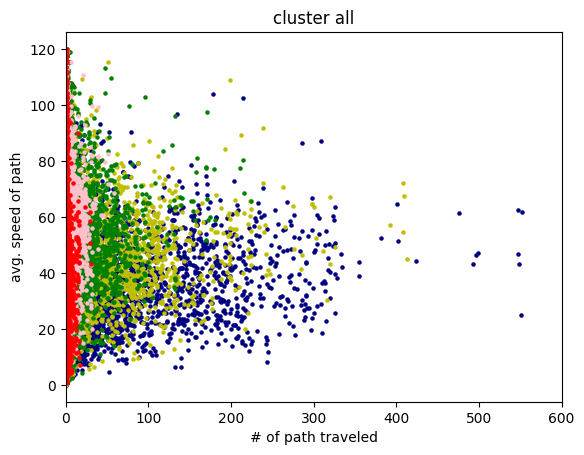

In [231]:
plt.scatter(df3_g['obu_id'], df3_g['speed'], s=5, c='navy')
plt.scatter(df4_g['obu_id'], df4_g['speed'], s=5, c='y')

plt.scatter(df1_g['obu_id'], df1_g['speed'], s=5, c='green')
plt.scatter(df2_g['obu_id'], df2_g['speed'], s=5, c='pink')
plt.scatter(df5_g['obu_id'], df5_g['speed'], s=5, c='red')

plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster all')
plt.xlim(0,600)


(0.0, 600.0)

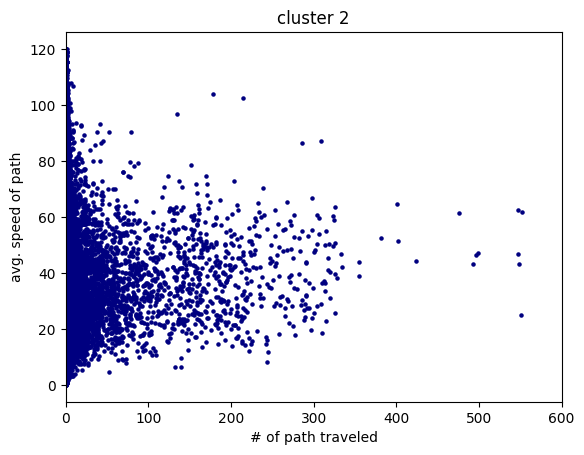

In [220]:
plt.scatter(df3_g['obu_id'], df3_g['speed'], s=5, c='navy')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 2')
plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 3')

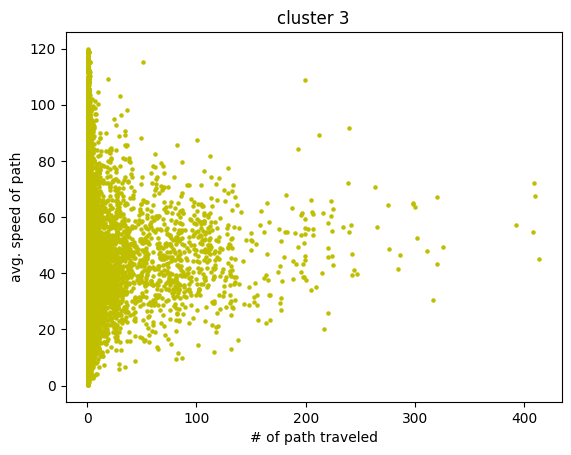

In [230]:
plt.scatter(df4_g['obu_id'], df4_g['speed'], s=5, c='y')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 3')
plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 0')

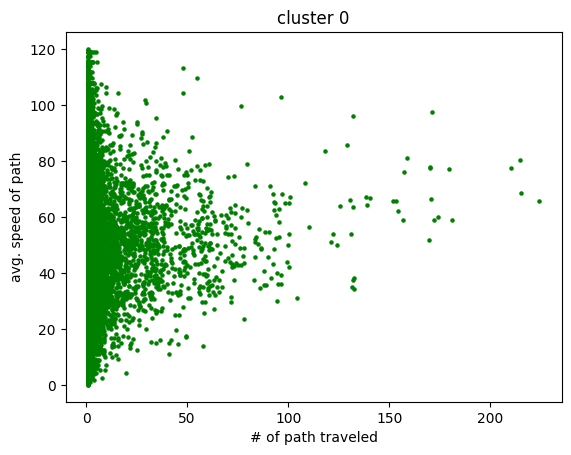

In [229]:
plt.scatter(df1_g['obu_id'], df1_g['speed'], s=5, c='green')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 0')
plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 1')

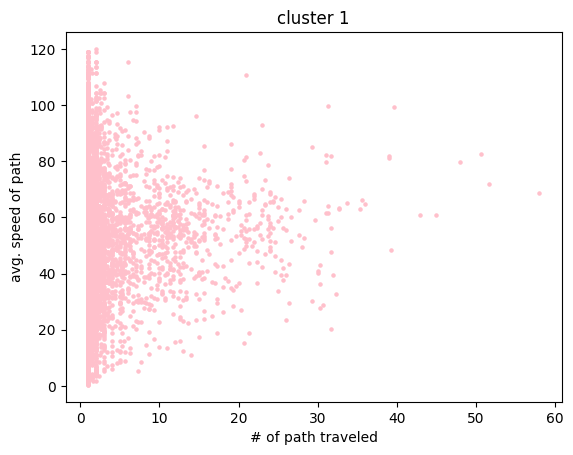

In [228]:
plt.scatter(df2_g['obu_id'], df2_g['speed'], s=5, c='pink')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 1')
# plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 4')

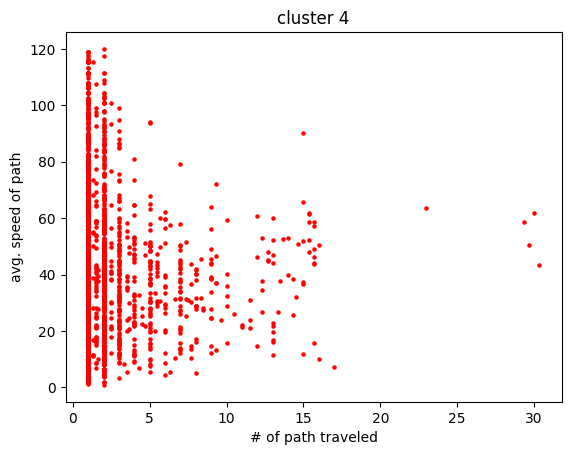

In [227]:
plt.scatter(df5_g['obu_id'], df5_g['speed'], s=5, c='red')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 4')
# plt.xlim(0,300)

In [247]:
df1 = pd.read_csv('tm_60_agg/spd_80/tm_14 01_00.csv')
df2 = pd.read_csv('tm_60_agg/spd_80/tm_14 02_00.csv')
df3 = pd.read_csv('tm_60_agg/spd_80/tm_14 03_00.csv')
df4 = pd.read_csv('tm_60_agg/spd_80/tm_14 23_00.csv')

df1 = pd.concat([df1, df2])
df1 = pd.concat([df1, df3])
df1 = pd.concat([df1, df4])

df1_g = df1.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df1_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
45741109302.000,45740044501.000,45741237001.000,1.000,90.000
45741131502.000,45741883801.000,45741884002.000,1.000,88.200
45741237001.000,45741237102.000,45740044802.000,1.000,68.800
45741448801.000,45741835601.000,45741507602.000,1.000,69.800
45741835601.000,45741507602.000,45741035601.000,1.000,73.516
...,...,...,...,...
92284174002.000,57284173902.000,57284691701.000,1.000,60.300
92735221702.000,47734550001.000,47735143602.000,1.000,96.480
92786803202.000,47785108101.000,47785108002.000,2.000,75.600


In [248]:
df5 = pd.read_csv('tm_60_agg/spd_80/tm_14 06_00.csv')
df6 = pd.read_csv('tm_60_agg/spd_80/tm_14 11_00.csv')
df7 = pd.read_csv('tm_60_agg/spd_80/tm_14 15_00.csv')
df8 = pd.read_csv('tm_60_agg/spd_80/tm_14 21_00.csv')
df9 = pd.read_csv('tm_60_agg/spd_80/tm_14 20_00.csv')


df5 = pd.concat([df5, df6])
df5 = pd.concat([df5, df7])
df5 = pd.concat([df5, df8])
df5 = pd.concat([df5, df9])

df2_g = df5.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df2_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
43450093301.000,43450148201.000,43450334002.000,1.000,68.400
43450094101.000,43450376202.000,43450154702.000,1.000,86.400
43450154701.000,43450376201.000,43450094102.000,1.000,55.906
43450334001.000,43450148202.000,43450093302.000,1.000,83.600
43450339802.000,43450368401.000,43450368402.000,1.000,39.150
...,...,...,...,...
92661463202.000,47660131102.000,47660131002.000,1.000,28.800
92735221702.000,47734550001.000,47735143602.000,1.000,74.215
92786803202.000,47785108101.000,47785108002.000,1.333,75.600


In [249]:
df10 = pd.read_csv('tm_60_agg/spd_80/tm_14 07_00.csv')
df11 = pd.read_csv('tm_60_agg/spd_80/tm_14 08_00.csv')
df12 = pd.read_csv('tm_60_agg/spd_80/tm_14 09_00.csv')
df13 = pd.read_csv('tm_60_agg/spd_80/tm_14 10_00.csv')
df14 = pd.read_csv('tm_60_agg/spd_80/tm_14 22_00.csv')


df10 = pd.concat([df10, df11])
df10 = pd.concat([df10, df12])
df10 = pd.concat([df10, df13])
df10 = pd.concat([df10, df14])

df3_g = df10.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df3_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
43461461201.000,43461464601.000,43461465201.000,1.000,96.900
43461464402.000,43461417201.000,43461463001.000,1.000,93.600
43461464601.000,43461465201.000,43461465002.000,1.000,111.600
43461465201.000,43461465002.000,43461464402.000,1.000,92.009
43471355001.000,43471355202.000,43461461201.000,1.000,84.185
...,...,...,...,...
92661463202.000,47660131102.000,47660131002.000,1.000,14.700
92786803202.000,47785108101.000,47785108002.000,1.750,75.600
92786804101.000,92786803202.000,47785108101.000,2.600,82.867


In [250]:
df15 = pd.read_csv('tm_60_agg/spd_80/tm_14 15_00.csv')
df16 = pd.read_csv('tm_60_agg/spd_80/tm_14 16_00.csv')
df17 = pd.read_csv('tm_60_agg/spd_80/tm_14 17_00.csv')
df18 = pd.read_csv('tm_60_agg/spd_80/tm_14 18_00.csv')

df15 = pd.concat([df15, df16])
df15 = pd.concat([df15, df17])
df15 = pd.concat([df15, df18])

df4_g = df15.groupby(['v_from_link_id', 'v_link_id', 'v_to_link_id']).agg({'obu_id':'mean', 'speed':'mean'})
df4_g

,,,obu_id,speed
v_from_link_id,v_link_id,v_to_link_id,,
43461461202.000,43471355201.000,43471354401.000,1.000,87.552
43461463002.000,43461417202.000,43461464401.000,1.000,105.300
43461463201.000,43461463002.000,43461417202.000,1.000,82.800
43461464401.000,43461465001.000,43461465202.000,1.000,89.918
43461464602.000,43461461202.000,43471355201.000,1.000,93.300
...,...,...,...,...
92521234002.000,58521035002.000,58421101801.000,1.000,90.000
92735221702.000,47734550001.000,47735143602.000,1.000,30.385
92786803202.000,47785108101.000,47785108002.000,2.000,75.600


Text(0.5, 1.0, 'cluster all')

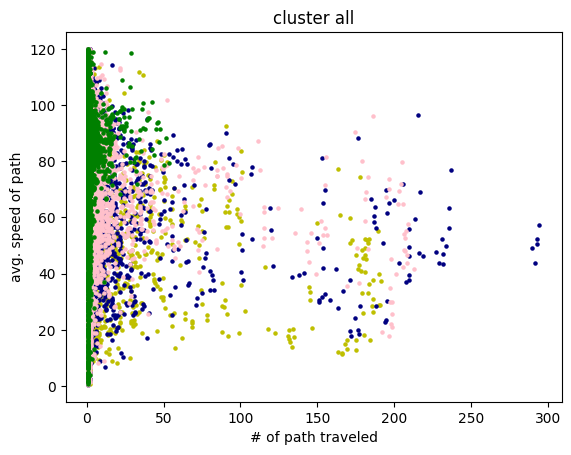

In [258]:
plt.scatter(df4_g['obu_id'], df4_g['speed'], s=5, c='y')
plt.scatter(df3_g['obu_id'], df3_g['speed'], s=5, c='navy')

plt.scatter(df2_g['obu_id'], df2_g['speed'], s=5, c='pink')
plt.scatter(df1_g['obu_id'], df1_g['speed'], s=5, c='green')

# plt.scatter(df5_g['obu_id'], df5_g['speed'], s=5, c='red')

plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster all')
# plt.xlim(0,600)


Text(0.5, 1.0, 'cluster 2')

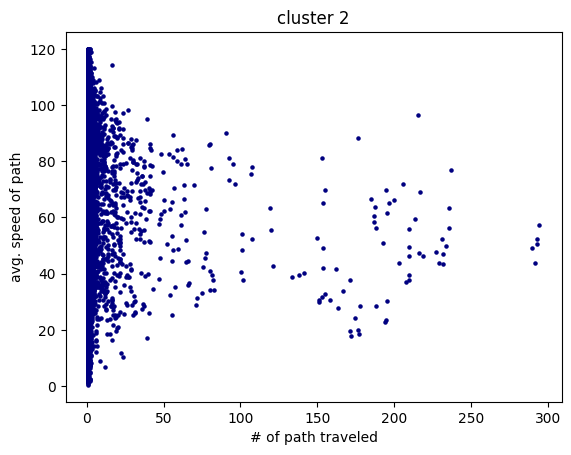

In [254]:
plt.scatter(df3_g['obu_id'], df3_g['speed'], s=5, c='navy')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 2')
# plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 3')

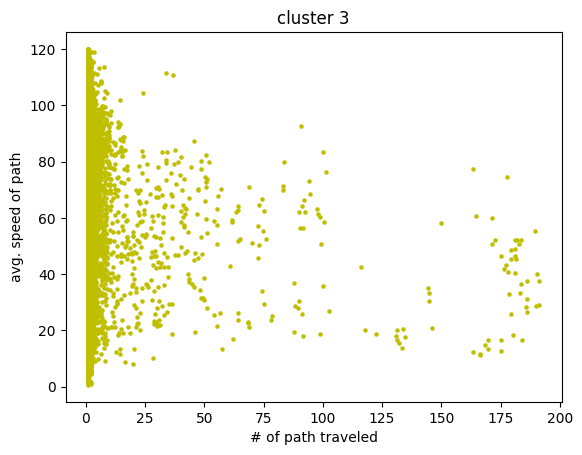

In [255]:
plt.scatter(df4_g['obu_id'], df4_g['speed'], s=5, c='y')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 3')
# plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 0')

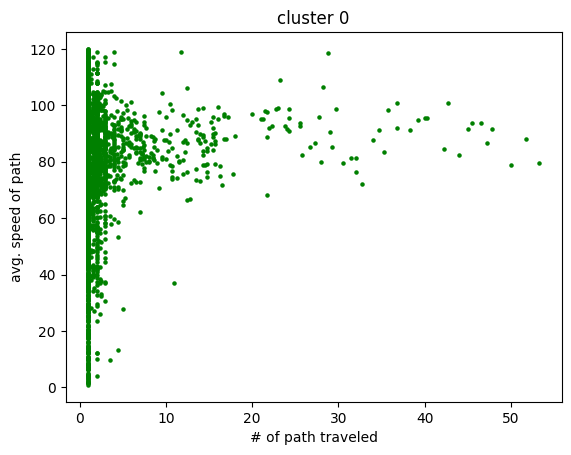

In [256]:
plt.scatter(df1_g['obu_id'], df1_g['speed'], s=5, c='green')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 0')
# plt.xlim(0,600)

Text(0.5, 1.0, 'cluster 1')

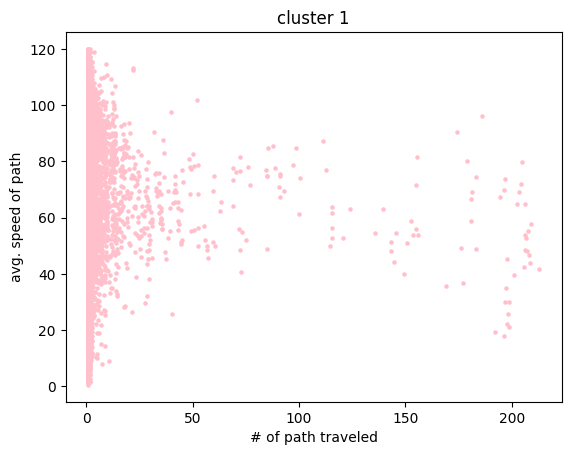

In [257]:
plt.scatter(df2_g['obu_id'], df2_g['speed'], s=5, c='pink')
plt.xlabel('# of path traveled')
plt.ylabel('avg. speed of path')
plt.title('cluster 1')
# plt.xlim(0,600)